<a href="https://colab.research.google.com/github/antndlcrx/Intro-to-LLMs-DPIR/blob/main/llm_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://cdn.githubraw.com/antndlcrx/Intro-to-Python-DPIR/main/images/logo_dpir.png?raw=true:,  width=35" alt="My Image" width=175>

# 🏛️ **LLM Fundamentals**

This is a key session in which you will learn what language models are, how they are build, and how they generate text sequences. When you are interacting with, say, a chat-bot, there are multiple fascinating concepts and ideas at play (what is a meaning of a word? what is a meaning of a sentence? how do we encode them?), as well as smart and elegant (and at times redundant) algorithms (tokenization, attention, backpropagation, etc.) that bring these concepts to life.

Their particular implementations determine how well a model perfoms, both as a general model of language and as a tool for solving your task. For instance, choosing appropriate way to tokenize text can make or break model's ability to write code. Therefore, having a good understanding of each of the building blocks of an LLM is of great importance.

🗓️ This session introduces:
- What does it mean to build a model of a language?  
- What do we practically need to do to build a language model?
- How to process human readable text input into machine readable input and back?
- Model architecture (transformer and attention)
- How does a language model generate text


## **1**.&nbsp; **What is a Language Model?**

Before we jump to technical details of language model implementation, let us stop and think what a language model is in general?

- What does it mean to model a language?
- Why would a language model be useful?
- What makes a good model?

Think about these questions, note your answers. Once you have them, I invite you to read the [chapter on language modelling](https://lena-voita.github.io/nlp_course/language_modeling.html) from the amazing [NLP Course for You](https://lena-voita.github.io/nlp_course.html) course.

### 1.1 🔮 **Language Modeling**

To build a language model, we come up with an idea of an algorithm that would translate our intuition from the previous exercise into a series of executable steps. This would be language modelling<a href="#footnote1"><sup>1</sup></a>.

Language modeling is a fundamental task in natural language processing (NLP), where the goal is to predict the next word in a sequence based on the preceding words. In other words, a language model aims to estimate the probability distribution of word sequences in a given language. Training a language model involves maximizing the likelihood that the model assigns to actual word sequences observed in the training data.

```perl
Predict next word based on previous context

Given a word sequence:
      w₁ → w₂ → w₃ → ... → wₙ₋₁ → wₙ
       │    │    │            │
       ▼    ▼    ▼            ▼
Predict:   Predict:   Predict:          Predict:
   w₂         w₃         w₄                 wₙ
given:      given:      given:            given:
  w₁       w₁,w₂      w₁,w₂,w₃        w₁,w₂,...,wₙ₋₁
```

**Mathematical Description**

Formally, given a sequence of words $(w_1, w_2, \dots, w_N)$, the language modeling objective is to maximize the joint probability of the entire sequence. Using the chain rule of probability, this joint probability can be decomposed into a product of conditional probabilities:

$$
P(w_1, w_2, \dots, w_N) = P(w_1) \cdot P(w_2 \mid w_1) \cdot P(w_3 \mid w_1, w_2) \dots P(w_N \mid w_1, w_2, \dots, w_{N-1})
$$

In practice, a language model predicts each word $w_n$ based solely on the preceding words, thus learning conditional probabilities:

$$
P(w_n \mid w_1, w_2, \dots, w_{n-1})
$$

---
<p id="footnote1"><sup>1</sup> There are several approaches to language modelling: traditional count-based ones and neural-network-based ones. Among the latter, there is <em>autoregressive language modelling</em> and <em>masked language modelling</em>. For the majority of this course, we will be working with autoregressive language models (you may know them as generative language models). For that reason, we will focus on autoregressive language modelling.</p>


### 1.2. 📉**Finding a Good Model: Negative Log Likelihood**
To effectively train language models, the objective is typically framed as minimizing the **negative log-likelihood** of these probabilities over the training corpus:

$$
\text{Minimize: } -\log P(w_1, w_2, \dots, w_N) = -\sum_{n=1}^{N} \log P(w_n \mid w_1, w_2, \dots, w_{n-1})
$$

This is exactly your maximul likelihood from stats!

- **Likelihood**: how probable is our data given the current model. We want our language model to assign high probabilities to the actual words seen during training.
- **Why Log?**: Probabilities multiply quickly, becoming very small numbers. **Taking a logarithm transforms these multiplications into sums, which are numerically stable and computationally convenient**. Instead of multiplying many small probabilities, we add their logarithms.
- **Why Negative?**: Our goal is to maximize likelihood, but mathematically it is more convenient to frame optimization problems as minimization. Thus, we minimize the negative of the log likelihood. **Minimizing the negative log likelihood is equivalent to maximizing the likelihood**.

This negative log-likelihood measure is computationally convenient and helps the model learn meaningful linguistic patterns by penalizing low-probability predictions.

```perl
Minimize negative log-likelihood:
  
− log [P(w₁, w₂, ..., wₙ)]
           │
           ▼
= − [log P(w₁) + log P(w₂|w₁) + log P(w₃|w₁,w₂) + ... + log P(wₙ|w₁,...,wₙ₋₁)]
```
---

### 1.2. 🤔 **Language Model Evaluation: Perplexity**
**Perplexity** is a measure used to evaluate how well a language model predicts unseen text. Intuitively, it answers the question: "How many equally likely words is my model choosing between?"

Formally, perplexity is defined as:

$$
\text{Perplexity} = e^{-\frac{1}{N}\sum_{n=1}^{N}\log P(w_n|w_1,\dots,w_{n-1})}
$$

We initially computed the **average negative log likelihood** (or cross-entropy). Taking the exponential **transforms the log-scale back to a normal scale**, giving us a measure that's intuitive to interpret as an effective "branching factor."

- **Lower perplexity** → the model is confident and accurate, fewer "choices" per step.
- **Higher perplexity** → the model is uncertain, predicting many possible next words.

🧠 Quick Intuitive Example:
- A perplexity of 1000 means the model is roughly guessing among 1000 possible words for every prediction — a poor model.

- A perplexity of 10 means the model consistently narrows down to about 10 possible words — a much better model.

> 📖 For more:
- [Language Modelling NLP Course for You](https://lena-voita.github.io/nlp_course/language_modeling.html)
- [Perplexity of fixed-length models
by 🤗](https://huggingface.co/docs/transformers/en/perplexity)


## **2**.&nbsp; 🍓 **Processing Text: Tokenisation**


### **Motivation**

**Tokenization** is the critical step of **converting human-readable text into numerical representations that language models can process**.

After defining language modeling as predicting words from context, the natural next question is: **how exactly do we represent words numerically**? This is precisely the role of tokenization.

Tokenization serves several key purposes:

1. **Reduction of Vocabulary Size**:
Natural languages are vast, filled with misspellings, colloquialisms, technical jargon, and new words constantly emerging. Tokenization condenses this enormous diversity into a fixed, manageable vocabulary, making computations feasible.

2. **Efficient Computation**:
Transforming words (or subwords) into numeric indices lets models efficiently perform mathematical operations required by neural networks.

3. **Meaningful Representation**:
Tokenization methods, especially subword approaches (like Byte-Pair Encoding or WordPiece), effectively handle semantic similarities. They break words down into meaningful parts, allowing models to generalize across related terms or word forms, even if the model hasn’t explicitly encountered them during training.

### **Lets Build a Tokenizer!**

Language models do not work on raw text. Insead, they operate on tokens, which are integer numbers denoting a unique identity (id) for every unique token in our vocabulary.

In this part of the tutorial we cover the functionality of a tokenizer.
- Tokenizer helps create vocabulary: a registry where every unique token we encounter is mapped to a unique token_id.
- Tokenizer uses this vocabulary to convert any sequence of tokens to token ids, which we then pass to a language model (they are the model's expected input!).
- Tokenizer also performs the reverse mapping: from token ids back to human readable words. This helps us convert language model outputs - sequences of token ids - back to human readable text!

To build a tokenizer, we first download training data, which are Jane Ostein novels. We then clean them up to remove unnecessary information and symbols, leaving out just chapter headings and chapter content. Then, we develop a `SimpleTokenizer`, which is a class (blueprint) for creating tokenizers from any text corpus that we want! Each of those would be a different tokenizer (depending on text data we feed to it), but will perform exactly the same functionality!



In [1]:
#@title Download Data for this Session

import requests

GUTENBERG_URLS = {
    "pride_and_prejudice.txt": "https://www.gutenberg.org/files/1342/1342-0.txt",
    "sense_and_sensibility.txt": "https://www.gutenberg.org/files/161/161-0.txt",
    "mansfield_park.txt": "https://www.gutenberg.org/files/141/141-0.txt"
}

DELIMITER = "\n<|endoftext|>\n\n"
COMBINED_FILENAME = "austen_combined.txt"

def download_file(filename, url):
    """Download a file and save it locally."""
    print(f"Downloading {filename}...")
    response = requests.get(url)
    response.raise_for_status()
    with open(filename, "w", encoding="utf-8") as f:
        f.write(response.text)

def combine_files(file_list, output_file, delimiter):
    """Combine a list of files into one, separated by a delimiter."""
    with open(output_file, "w", encoding="utf-8") as outfile:
        for fname in file_list:
            with open(fname, "r", encoding="utf-8") as infile:
                text = infile.read().strip()
                outfile.write(text + delimiter)


for fname, url in GUTENBERG_URLS.items():
    download_file(fname, url)
combine_files(GUTENBERG_URLS.keys(), COMBINED_FILENAME, DELIMITER)


# with open("austen_combined.txt", "r", encoding="utf-8") as f:
#     raw_text = f.read()

# len(raw_text)

In [2]:
# load data
with open("austen_combined.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

len(raw_text)

2302675

In [3]:
#@title Clean Up the Raw Text
import re

def clean_gutenberg_text(text):
    """
    Cleans Gutenberg text by removing header, footer, and metadata.
    """
    # Remove header
    text = re.split(r"\*\*\* START OF (THE|THIS) PROJECT GUTENBERG EBOOK .* \*\*\*", text, flags=re.IGNORECASE)[-1]

    # Remove footer
    text = re.split(r"\*\*\* END OF (THE|THIS) PROJECT GUTENBERG EBOOK .* \*\*\*", text, flags=re.IGNORECASE)[0]

    # Remove illustration tags and bracketed contents
    text = re.sub(r"\[Illustration.*?\]", "", text, flags=re.DOTALL)

    # Remove "Contents" and chapter listings (ToC)
    text = re.split(r"Contents\n\n", text, flags=re.IGNORECASE)
    if len(text) > 1:
        text = re.split(r"\n{2,}(CHAPTER\s+I\b)", text[1], flags=re.IGNORECASE)
        text = "".join(text[-2:]) if len(text) >= 2 else text[-1]
    else:
        text = text[0]

    # Remove excessive newlines and whitespace
    text = re.sub(r"\n{2,}", "\n\n", text)

    # Strip leading and trailing whitespace
    text = text.strip()

    return text

cleaned_text = clean_gutenberg_text(raw_text)

In [ ]:
cleaned_text[:300]

'CHAPTER I\n\nAbout thirty years ago Miss Maria Ward, of Huntingdon, with only seven\nthousand pounds, had the good luck to captivate Sir Thomas Bertram, of\nMansfield Park, in the county of Northampton, and to be thereby raised\nto the rank of a baronet’s lady, with all the comforts and consequences\nof a'

In [ ]:
str.split?

In [ ]:
#@title Exercise: Build a Tokenizer!

# Hint 1: try out the .split() and .join() str methods. Use "str.split?" syntax to read documentation if needed.
# Hint 2: utilisee python dictionary methods like .get(), .items() to work with dictionaries.

class SimpleTokenizer():
    """
    A simple word-level tokenizer for converting text into integer token IDs and back.

    This tokenizer:
    - Builds a vocabulary from training text by splitting on whitespace.
    - Encodes input text as a list of token IDs based on the vocabulary.
    - Decodes token ID sequences back into human-readable text.
    - Includes a special "<unk>" token for unknown words not seen during training.

    Attributes:
        word_set (list): Sorted list of unique words from the training text.
        vocab (dict): Maps words to integer token IDs.
        inverse_vocab (dict): Maps token IDs back to words.
    """

    # TASK 1: DEFINE CLASS ATTRIBUTES
    def __init__(self, train_text):
        """
        Initialize the tokenizer with a vocabulary built from the training text.

        Args:
            train_text (str): A raw string of training text.
        """
        self.word_set = # split the raw text on whitespace; collect and sort unique words
        self.vocab =  # create a mapping from word to token ID
        self.vocab["<unk>"] = # assign a special token ID for unknown words
        self.inverse_vocab =  # create a reverse mapping from ID to word

    # TASK 2: DEFINE ENCODE METHOD
    def encode(self, text:str):
        """
        Convert a space-separated string into a list of token IDs.
        Each word is looked up in the vocabulary; unknown words are mapped to the '<unk>' token ID.

        Args:
            text (str): The input string to tokenize.

        Returns:
            list[int]: A list of token IDs.
        """
        # YOUR CODE HERE
        return

    # TASK 3: DEFINE DECODE METHOD
    def decode(self, token_ids: list[int]):
        """
        Convert a list of token IDs back into a space-separated string.
        Each token ID is mapped back to its corresponding word using the inverse vocabulary.

        Args:
            token_ids (list[int]): A sequence of token IDs to decode.

        Returns:
            str: A decoded string formed by joining the tokens with spaces.
        """

        # YOUR CODE HERE
        return

In [ ]:
# let us test the tokenizer we crated!

tokenizer = SimpleTokenizer(cleaned_text) # creates an instance of SimpleTokenizer, built from cleaned_text

test = tokenizer.encode(cleaned_text[:995])
test_decoded = tokenizer.decode(test)

print("Encoded sequence:", test, "\n"*2, "Decoded sequence", test_decoded)

Encoded sequence: [202, 531, 48, 14232, 15730, 1957, 694, 663, 1133, 10216, 529, 15542, 10303, 12783, 14269, 11083, 7324, 14131, 7103, 9231, 14352, 3359, 951, 1055, 150, 10216, 653, 797, 8110, 14131, 4393, 10216, 749, 2170, 14352, 2772, 14180, 11626, 14352, 14131, 11638, 10216, 1550, 2758, 8789, 15542, 2028, 14131, 3828, 2170, 4152, 10216, 2167, 7377, 7832, 2170, 8828, 8146, 73, 528, 6068, 10278, 14131, 7225, 10216, 14131, 9356, 2170, 7605, 14686, 14131, 8888, 7694, 2057, 7605, 14352, 2772, 2531, 8916, 14280, 14269, 11082, 12885, 10216, 2248, 5889, 3677, 14352, 8578, 942, 7324, 14634, 13033, 14352, 2772, 2926, 3282, 7605, 5668, 2170, 13743, 10216, 14139, 1691, 2440, 14252, 694, 1132, 2170, 694, 417, 11608, 2440, 7377, 2440, 694, 665, 4986, 10038, 12561, 14352, 11149, 14139, 9347, 15542, 2074, 5879, 1832, 190, 14171, 3466, 2373, 10038, 13150, 9315, 9482, 10216, 8828, 6752, 8110, 14131, 15643, 2440, 14171, 2373, 11229, 15585, 14352, 4862, 14148, 694, 1133, 2531, 14131, 5743, 10216, 7332,

In [ ]:
#@title Solution: Build a Tokenizer
class SimpleTokenizer():
    """
    A simple word-level tokenizer for converting text into integer token IDs and back.

    This tokenizer:
    - Builds a vocabulary from training text by splitting on whitespace.
    - Encodes input text as a list of token IDs based on the vocabulary.
    - Decodes token ID sequences back into human-readable text.
    - Includes a special "<unk>" token for unknown words not seen during training.

    Attributes:
        word_set (list): Sorted list of unique words from the training text.
        vocab (dict): Maps words to integer token IDs.
        inverse_vocab (dict): Maps token IDs back to words.
    """

    def __init__(self, train_text):
        """
        Initialize the tokenizer with a vocabulary built from the training text.

        Args:
            train_text (str): A raw string of training text.
        """
        self.word_set = sorted(set(train_text.split()))  # split the raw text on whitespace; collect and sort unique words
        self.vocab = {el:i for i, el in enumerate(self.word_set)}  # create a mapping from word to token ID
        self.vocab["<unk>"] = len(self.word_set) + 1  # assign a special token ID for unknown words
        self.inverse_vocab = {i:el for el, i in self.vocab.items()}  # create a reverse mapping from ID to word

    def encode(self, text:str):
        """
        Convert a space-separated string into a list of token IDs.
        Each word is looked up in the vocabulary; unknown words are mapped to the '<unk>' token ID.

        Args:
            text (str): The input string to tokenize.

        Returns:
            list[int]: A list of token IDs.
        """
        # for every word in the input string, get its token ID (or use <unk> if not found)
        token_ids = [self.vocab.get(x, self.vocab["<unk>"]) for x in text.split()]
        return token_ids

    def decode(self, token_ids: list[int]):
        """
        Convert a list of token IDs back into a space-separated string.
        Each token ID is mapped back to its corresponding word using the inverse vocabulary.

        Args:
            token_ids (list[int]): A sequence of token IDs to decode.

        Returns:
            str: A decoded string formed by joining the tokens with spaces.
        """
        # for every token ID in the list, get its word representation from the inverse vocab
        words = [self.inverse_vocab[x] for x in token_ids]
        return " ".join(words)

In [ ]:
# try any other imaginable text input!
test = tokenizer.encode("I like walking my dog in the evenings in the University park where sunsets are just so beautiful.")
test_decoded = tokenizer.decode(test)
print("Encoded sequence:", test, "\n"*2, "Decoded sequence", test_decoded)

Encoded sequence: [531, 9038, 15200, 9812, 16182, 8110, 14131, 5964, 8110, 14131, 16182, 10568, 15409, 16182, 2373, 8656, 13150, 16182] 

 Decoded sequence I like walking my <unk> in the evenings in the <unk> park where <unk> are just so <unk>


### 🔗 **Byte-Pair Encoding (BPE)**

A common challenge in language modeling is dealing with words that weren't present in the training data. **Byte-Pair Encoding (BPE)**, introduced by [Sennrich et al. (2015)](https://arxiv.org/abs/1508.07909), elegantly solves this by breaking words into smaller, meaningful subword units. **The key idea is simple yet powerful: it iteratively merges the most frequent pairs of bytes or characters in the training corpus to build a flexible vocabulary**.

By doing so, **BPE allows models to handle unseen or rare words effectively, dramatically improving their generalization**.

 > 📖 For an in-depth exploration of BPE, check out the [Hugging Face NLP Course (Chapter 6)](https://huggingface.co/learn/nlp-course/en/chapter6/5), or watch [Andrej Karpathy's "Let's Build a GPT Tokenizer" video](https://www.youtube.com/watch?v=zduSFxRajkE).


> 📚 Several libraries implement BPE:

- [**Tiktoken** by OpenAI](https://github.com/openai/tiktoken)
- [**SentencePiece** by Google](https://github.com/google/sentencepiece)

🛠️ Try exploring how tokenizers process text directly in the [Tiktokenizer app](https://tiktokenizer.vercel.app/).



In [4]:
# we need to install the library to get pretrained tokenizers
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.5 MB/s eta 0:00:00


In [5]:
import tiktoken

# we select the tokenizer used to train the original gpt-2 model
bpe_tokenizer = tiktoken.get_encoding("gpt2")

In [ ]:
bpe_tokenizer.n_vocab # n.vocab stores how many unique tokens we have in the tokenizers vocabulary

50257

In [ ]:
tokens = bpe_tokenizer.encode("I like walking my dog in the evenings in the University park where sunsets are just so beautiful.")
print(tokens)
bpe_tokenizer.decode(tokens)

[40, 588, 6155, 616, 3290, 287, 262, 37119, 287, 262, 2059, 3952, 810, 4252, 28709, 389, 655, 523, 4950, 13]


'I like walking my dog in the evenings in the University park where sunsets are just so beautiful.'

Now that we have a working tokenizer that can generalize well, we can proceed to prepare data for language model training. We need to convert it to sets of input target pairs for the model to predict, so that it can learn language!

We would need 🛠️ to convert our data from Jane Austin books into this format.  `DataSet` and `DataLoader` from PyTorch are perfectly designed to do just that!

## **Extra:🔧Torch DataLoader and DataSet**

In PyTorch, a `Dataset` provides an **organized way of accessing and managing your data**, while a `DataLoader` handles *batching*, *shuffling*, and **efficiently loading data during training**. Specifically, a `Dataset` defines how individual data samples (inputs and labels) are accessed, while a `DataLoader` wraps around it to deliver batches seamlessly to your model. Together, they simplify data management, enhance training speed, and help ensure reproducible and robust training pipelines.

- **Batch**: A batch is a group of samples processed together in a single forward and backward pass during training, which improves computational efficiency and stabilizes gradient updates.

- **Shuffling**: Shuffling randomly reorders the dataset before each epoch to prevent the model from learning spurious patterns tied to the order of the data.


We use these 🛠️ to create a flow of input-target pairs of tokens to train a language model.

Suppose we have a sequence of tokens:

```ini
token_ids = [t₀, t₁, t₂, t₃, ..., tₙ₋₂, tₙ₋₁, tₙ]
```

We construct training examples by defining a context lenghth (for example `context_len=4`) and a sliding window (`stride`=2) as follows:

```less
Iteration 1:
    Input (X):   [t₀,   t₁,   t₂,   t₃]
    Target (Y):  [t₁,   t₂,   t₃,   t₄]

Iteration 2 (stride forward by 2):
    Input (X):   [t₂,   t₃,   t₄,   t₅]
    Target (Y):  [t₃,   t₄,   t₅,   t₆]

Iteration 3:
    Input (X):   [t₄,   t₅,   t₆,   t₇]
    Target (Y):  [t₅,   t₆,   t₇,   t₈]

...
```

until no full sequences remain.

The **context window** is the number of tokens an LLM considers simultaneously when predicting the next token. A **longer context window gives the model more information and improves its ability to capture meaningful relationships**, but at the cost of increased computational requirements.

The **stride determines how much the context window moves forward between each training example**. A smaller stride creates more overlapping examples, increasing the amount of training data but also introducing redundancy. A larger stride reduces overlap and speeds up data preparation but can reduce the diversity of training examples. Choosing these parameters involves balancing model performance, computational efficiency, and the richness of training data.

In [6]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split

In [ ]:
len(bpe_tokenizer.encode(cleaned_text))

223694

In [7]:
#@title Create Dataset and DataLoader

class CustomDataset(Dataset):
    """
    A custom dataset for next-token prediction in language modeling.

    This dataset creates input-target pairs by sliding a window of `context_len`
    over the tokenized text with a fixed `stride`.

    Each sample consists of:
    - X: A sequence of `context_len` token IDs (input).
    - Y: The same sequence shifted one position to the right (target).

    Args:
        text (str): The raw training text.
        tokenizer (Tokenizer): A tokenizer with an `encode()` method.
        context_len (int): Length of each input sequence.
        stride (int): Number of tokens to move the window by for the next sample.
    """

    # we initialise any CustomDataset with text data (like a novel by Jane Austin), a tokenizer, desired context_len, and stride
    def __init__(self, text, tokenizer, context_len, stride):
        super().__init__()

        # creating placeholders for inputs and outputs (both sequences of token ids)
        self.Y = []
        self.X = []

        # Tokenize the entire input text
        input_ids = tokenizer.encode(text, allowed_special={"<|endoftext|>"})

        # slide a window over the tokenized input to create input-target pairs
        for i in range(0, len(input_ids) - context_len, stride):
            xids = input_ids[i: i + context_len]  # input sequence
            yids = input_ids[i + 1: i + 1 + context_len] # shifted target sequence

            # as we iterate over dataset, we fill the placeholders
            self.X.append(torch.tensor(xids))
            self.Y.append(torch.tensor(yids))

    def __len__(self):
        """Returns the total number of samples in the dataset."""
        return len(self.X)

    def __getitem__(self, idx):
        """
        Returns a single input-target pair at index `idx`.

        Returns:
            tuple: (input_tensor, target_tensor)
        """
        return self.X[idx], self.Y[idx]

In [8]:
#@title Instantiate the Dataset and create Train and Val Loaders
ds = CustomDataset(cleaned_text, bpe_tokenizer, context_len=128, stride=64)


### Train Val Split ###
# to test how well our model can perform on unseen data, we create a data split to use a smaller version of it just for validation.
#(we want model to generalize: develop language comprehension abilities, not "memorise" our training data!!)

dataset_size = len(ds)
train_size = int(0.9 * dataset_size) # training data will be 90% of all original data
val_size = dataset_size - train_size # the remaining 10% will be our validation data

print(f"Train size: {train_size}; Val size: {val_size}")

# split data randomly, but in a reproducable way (with a set random number generator: seed)
generator = torch.Generator().manual_seed(42)
train_ds, val_ds = random_split(ds, [train_size, val_size], generator=generator)

### Create DataLoaders ###
train_loader = DataLoader(
    train_ds,
    batch_size=64, # n sequences of tokens per batch
    shuffle=True,  # shuffle for training
    drop_last=True, # drop incomplete batches
    num_workers=0 # load data in the main process (safer for notebooks/debugging)
)

val_loader = DataLoader(
    val_ds,
    batch_size=64, # n sequences of tokens per batch
    shuffle=False,  # no need to shuffle for validation
    drop_last=True, # drop incomplete batches
    num_workers=0 # load data in the main process (safer for notebooks/debugging)
)

Train size: 3144; Val size: 350


In [9]:
# test what our dataloader is doing
torch.manual_seed(42)
for i, (x,y) in enumerate(train_loader):
    print(f'batch {i}:',"\n", x, "\n", y)
    print(f'batch {i}:',"\n", x.shape, "\n", y.shape)
    break

batch 0: 
 tensor([[   11,   290,   787,  ...,    82, 45795,    11],
        [   83, 30075,   607,  ...,  4621,   286,   340],
        [  355,  4544, 24499,  ...,  2089,    11,   290],
        ...,
        [  447,   251,   198,  ...,  3368, 18877,    13],
        [  392,   477,   326,  ...,   654,   286,   198],
        [  611,  8168,   198,  ..., 40314,   284,   466]]) 
 tensor([[  290,   787,   340,  ..., 45795,    11,   290],
        [30075,   607,  7634,  ...,   286,   340,    11],
        [ 4544, 24499,   198,  ...,    11,   290,   198],
        ...,
        [  251,   198,   198,  ..., 18877,    13,  4544],
        [  477,   326,   636,  ...,   286,   198, 48466],
        [ 8168,   198, 17772,  ...,   284,   466,   262]])
batch 0: 
 torch.Size([64, 128]) 
 torch.Size([64, 128])


In [ ]:
# test what our dataloader is doing, this time converting token sequences back to text

torch.manual_seed(42)

for i, (x, y) in enumerate(train_loader):
    print(f"Batch {i} (shape: {x.shape})")

    # Decode the first few examples in the batch
    for idx in range(5):  # Show first 5 samples
        input_text = bpe_tokenizer.decode(x[idx].tolist())
        target_text = bpe_tokenizer.decode(y[idx].tolist())

        print(f"\nSample {idx + 1}:")
        print("Input :", input_text)
        print("Target:", target_text)

    break

Batch 0 (shape: torch.Size([64, 128]))

Sample 1:
Input : , and make it a very suffering
exhibition to herself. Whatever might be its effect, however, she must
stand the brunt of it again that very day.

The first regular rehearsal of the three first acts was certainly to
take place in the evening: Mrs. Grant and the Crawfords were engaged to
return for that purpose as soon as they could after dinner; and every
one concerned was looking forward with eagerness. There seemed a
general diffusion of cheerfulness on the occasion. Tom was enjoying
such an advance towards the end; Edmund was in spirits from the
morning’s rehearsal,
Target:  and make it a very suffering
exhibition to herself. Whatever might be its effect, however, she must
stand the brunt of it again that very day.

The first regular rehearsal of the three first acts was certainly to
take place in the evening: Mrs. Grant and the Crawfords were engaged to
return for that purpose as soon as they could after dinner; and every
one

## **3**.&nbsp; **Building a (Transformer) Language Model**

Now that we have prepared our data and downloaded an efficient tokenizer, we can proceed to building and training a language model itself!

To do that, we implement the general pipeline:

```perl
      Input text
          │
          ▼
      Token IDs
          │
          ▼
      Embeddings
          │
          ▼
    Neural Network
          │
          ▼
Output Probabilities over Vocabulary
```

### **3. 1**.&nbsp; **Input Embeddings**

We will start by creating an **embedding layer**.

An **embedding layer is essentially a lookup table that maps each token ID to a fixed-size vector**. These vectors—called embeddings—are **dense representations that capture some of the meaning or usage patterns of tokens based on their context in the training data**. Rather than treating tokens as one-hot or integer indices, embeddings let the model work in a continuous vector space, where similar words can be placed closer together.

❗In Transformer-based language models, we don't just represent individual tokens—we also encode where each token appears in the sequence. This is done by adding positional embeddings to token embeddings, allowing the model to differentiate between, for example, "dog bites man" and "man bites dog." Since Transformers process the entire input at once (not step-by-step like RNNs), positional information must be explicitly provided so the model understands word order.

In our `BaseLanguageModel`, we rely on RNN, so we do not encode word positions, RNN does it by default.



In [ ]:
#@title Embedding Layer Showcase

# create an embedding layer with:
# - vocab size of 5 (token IDs range from 0 to 4)
# - embedding dimension of 4 (each token will be represented by a 4D vector)
embd_layer = torch.nn.Embedding(5, 4)

# create a toy input sequence of token IDs (e.g., as if these were words in a sentence)
x = torch.tensor([4, 0, 1])

# Take a look at the embedding matrix (5 tokens × 4 dimensions)
print("Embedding matrix:\n", embd_layer.weight, "\n")

# use the embedding layer to look up vector representations of the input tokens
print("Embedded input:\n", embd_layer(x))

Embedding matrix:
 Parameter containing:
tensor([[ 0.6784, -1.2345, -0.0431, -1.6047],
        [ 0.3559, -0.6866, -0.4934,  0.2415],
        [-1.1109,  0.0915, -2.3169, -0.2168],
        [-0.3097, -0.3957,  0.8034, -0.6216],
        [-0.5920, -0.0631, -0.8286,  0.3309]], requires_grad=True) 

Embedded input:
 tensor([[-0.5920, -0.0631, -0.8286,  0.3309],
        [ 0.6784, -1.2345, -0.0431, -1.6047],
        [ 0.3559, -0.6866, -0.4934,  0.2415]], grad_fn=<EmbeddingBackward0>)


### **3.2 Build a simple (RNN) language model**

We will start with a basic language model consisting of just one *recurrent neural network (RNN)* layer<a href="#footnote2"><sup>1</sup></a>, to develop an intuition on how a language model is constructed: its methods, attributes, and training behaviour.

Building a language model from scratch—even a simple one—is a powerful way to understand how machines learn patterns in language. Instead of treating language as a bag of words, we're teaching our model to predict the next word in a sentence based on the words that came before.



<p id="footnote2">
  <sup>1</sup> 🤖 What is an RNN?<br>
  A recurrent neural network (RNN) is a type of neural network that is designed to process sequences of data—like words in a sentence—one step at a time, while keeping track of what it has seen so far.
  <strong>At each time step, it takes in a token (like a word or character), updates an internal "memory" (called a hidden state), and makes a prediction.</strong>
  This memory allows it to capture context and order, which are crucial for understanding language.<br><br>
  RNNs are a great starting point because they are conceptually simple and were historically the first models to successfully handle sequential tasks like text generation.
  Although modern language models use more advanced architectures like <em>Transformers</em>, understanding RNNs gives you the foundation to appreciate how sequence modeling works—and where its limitations lie.
</p>

In [ ]:
#@title Exercise: Complete a Language Model Implementation

# TASK 1: Implement the right sequence of steps to do a forward pass (from inputs to logits/output "probabilities/similarity scores")
# Hint: The steps are defined in the __init__() method. Use pytorch documentation to aid yourself.

class BaseLanguageModel(torch.nn.Module):
    """
    A basic autoregressive language model using a single RNN layer.

    This model takes in sequences of token IDs and learns to predict the next token
    at each position. It consists of an embedding layer, an RNN, and a linear output layer.

    Args:
        n_embd (int): Dimensionality of the token embeddings.
        n_hidden (int): Number of hidden units in the RNN.
        tokenizer (SimpleTokenizer): Tokenizer with vocabulary used for encoding/decoding text.
        device (str): Device to run the model on ('cuda' or 'cpu').
    """

    def __init__(self, n_embd, n_hidden, tokenizer, device):
        super().__init__()
        self.n_embd = n_embd   # store n_embd as instance attribute named "n_embd"
        self.n_hidden = n_hidden # store n_hidden as instance attribute named "n_hidden"
        self.tokenizer = tokenizer # store tokenizer as instance attribute named "tokenizer"
        self.device = device # store device as instance attribute named "device"

        # Learnable embedding lookup table for tokens of dimension [vocab_size, n_embd]
        self.embd = torch.nn.Embedding(self.tokenizer.n_vocab, self.n_embd)

        # A simple recurrent neural network
        self.rnn = torch.nn.RNN(self.n_embd, self.n_hidden, batch_first=True)

        # Output layer: projects hidden states to vocabulary logits
        self.out = torch.nn.Linear(self.n_hidden, self.tokenizer.n_vocab)

    def forward(self, x):
        """
        Forward pass through the language model.

        Args:
            x (Tensor): Input tensor of shape [batch_size, context_len].

        Returns:
            logits (Tensor): Predicted logits for each token in the vocabulary.
        """
        # YOUR CODE HERE
        return logits                       # returns raw "similarity scores" between sequence representation and all possible vocab token representations

    def fit(self, train_loader, val_loader=None, epochs=10, lr=1e-3):
        """
        Train the language model.

        Args:
            train_loader (DataLoader): Training set wrapped in a DataLoader.
            val_loader (DataLoader, optional): Validation set for evaluation.
            epochs (int): Number of training epochs. Determines how many times we go over entire train data.
            lr (float): Learning rate for optimizer. Determines how much we update model params.
        """
        self.to(self.device) # which hardware to use to train model on
        optimizer = torch.optim.Adam(self.parameters(), lr=lr) # pick an algorithm to optimize model parameters
        loss_fn = torch.nn.CrossEntropyLoss() # loss function we use to evaluate model performance

        # go over train data to perform computation several times (set by epochs=n)
        for epoch in range(epochs):
            self.train() # put model to "training mode"
            total_train_loss = 0.0 # placeholder to record our loss values (capturing model performance quality)

            # go over each input - output sequence pairs in dataloader
            for X, Y in train_loader:
                X, Y = X.to(self.device), Y.to(self.device) # put data on the same hardware as model, otherwise cant train model!

                logits = self(X)                           # Forward pass: make predictions based on current model parameters
                logits = logits.view(-1, self.tokenizer.n_vocab)  # Flatten to [batch * seq_len, vocab_size]; this is needed for torch.nn.CrossEntropyLoss()
                Y = Y.view(-1)                             # Flatten targets to [batch * seq_len]; same as above

                loss = loss_fn(logits, Y)               # calculate current model perfomrance, depicted in one scalar value

                optimizer.zero_grad()               # remove information on gradients from the previous run, otherwise they get conflated with grads from current run!
                loss.backward()                 # compute gradients of the loss fn with respect to model params to learn how to update them
                optimizer.step()            # with information from gradients, update parameters in the right direction

                total_train_loss += loss.item()     # record current loss

            average_loss = total_train_loss / len(train_loader)     # record average loss over batches for the entire epoch

            # Evaluate on validation set, if provided
            if val_loader is not None:
                self.eval() # set model to evaluation mode (turns of some functionality, not exactly needed here in BaseLanguageModel)
                total_val_loss = 0.0


                with torch.no_grad(): # do not compute and do not trace gradients!

                    # for all input-output pairs in val dataloader:
                    for Xv, Yv in val_loader:
                        Xv, Yv = Xv.to(self.device), Yv.to(self.device) # put data on same hardware as model
                        val_logits = self(Xv).view(-1, self.tokenizer.n_vocab) # adjust logits shape similar as in train
                        Yv = Yv.view(-1)                # adjust ground truth labels shape similar as in train
                        val_loss = loss_fn(val_logits, Yv) # compute loss
                        total_val_loss += val_loss.item() # record loss

                avg_val_loss = total_val_loss / len(val_loader)  # get average loss across batches for the entire epoch

                print(f"Epoch [{epoch+1}/{epochs}]"
                      f"  Train Loss: {average_loss:.3f}"
                      f"  |  Val Loss: {avg_val_loss:.3f}")
            else:
                print(f"Epoch [{epoch+1}/{epochs}]"
                      f"  Train Loss: {average_loss:.3f}")

In [ ]:
### Training set-up

## uncomment below to change dataloader configurations! ###
## Relevant params here are context_len, stride, batch_size! ###

ds = CustomDataset(cleaned_text, bpe_tokenizer, context_len=128, stride=64)

dataset_size = len(ds)
train_size = int(0.9 * dataset_size) # training data will be 90% of all original data
val_size = dataset_size - train_size # the remaining 10% will be our validation data

print(f"Train size: {train_size}; Val size: {val_size}")

# split data randomly, but in a reproducable way (with a set random number generator: seed)
generator = torch.Generator().manual_seed(42)
train_ds, val_ds = random_split(ds, [train_size, val_size], generator=generator)

### Create DataLoaders ###
train_loader = DataLoader(
    train_ds,
    batch_size=64, # n sequences of tokens per batch
    shuffle=True,  # shuffle for training
    drop_last=True, # drop incomplete batches
    num_workers=0 # load data in the main process (safer for notebooks/debugging)
)

val_loader = DataLoader(
    val_ds,
    batch_size=64, # n sequences of tokens per batch
    shuffle=False,  # no need to shuffle for validation
    drop_last=True, # drop incomplete batches
    num_workers=0 # load data in the main process (safer for notebooks/debugging)
)

Train size: 3144; Val size: 350


In [ ]:
### training ###

# uncomment in case CUDA out of memory
# del model
# torch.cuda.empty_cache()

config = {
    "tokenizer": bpe_tokenizer,
    "device": "cuda"
}

model = BaseLanguageModel(n_embd=128, n_hidden=128, **config)
model.fit(train_loader, val_loader, epochs=5, lr=0.01)

Epoch [1/5]  Train Loss: 6.264  |  Val Loss: 5.223
Epoch [2/5]  Train Loss: 4.832  |  Val Loss: 4.663
Epoch [3/5]  Train Loss: 4.355  |  Val Loss: 4.395
Epoch [4/5]  Train Loss: 4.063  |  Val Loss: 4.219
Epoch [5/5]  Train Loss: 3.842  |  Val Loss: 4.081


In [ ]:
#@title Solution: Build a Base LM

class BaseLanguageModel(torch.nn.Module):
    """
    A basic autoregressive language model using a single RNN layer.

    This model takes in sequences of token IDs and learns to predict the next token
    at each position. It consists of an embedding layer, an RNN, and a linear output layer.

    Args:
        n_embd (int): Dimensionality of the token embeddings.
        n_hidden (int): Number of hidden units in the RNN.
        tokenizer (SimpleTokenizer): Tokenizer with vocabulary used for encoding/decoding text.
        device (str): Device to run the model on ('cuda' or 'cpu').
    """

    def __init__(self, n_embd, n_hidden, tokenizer, device):
        super().__init__()
        self.n_embd = n_embd   # store n_embd as instance attribute named "n_embd"
        self.n_hidden = n_hidden # store n_hidden as instance attribute named "n_hidden"
        self.tokenizer = tokenizer # store tokenizer as instance attribute named "tokenizer"
        self.device = device # store device as instance attribute named "device"

        # Learnable embedding lookup table for tokens of dimension [vocab_size, n_embd]
        self.embd = torch.nn.Embedding(self.tokenizer.n_vocab, self.n_embd)

        # A simple recurrent neural network
        self.rnn = torch.nn.RNN(self.n_embd, self.n_hidden, batch_first=True)

        # Output layer: projects hidden states to vocabulary logits
        self.out = torch.nn.Linear(self.n_hidden, self.tokenizer.n_vocab)

    def forward(self, x):
        """
        Forward pass through the language model.

        Args:
            x (Tensor): Input tensor of shape [batch_size, context_len].

        Returns:
            logits (Tensor): Predicted logits for each token in the vocabulary.
        """
        x = self.embd(x)                   # Embed token IDs to [batch, context_len, n_embd]; effectively "picks up" relevent token ids from embedding table
        x, hidden = self.rnn(x)            # RNN processes the sequence → [batch, context_len, n_hidden]
        logits = self.out(x)               # Project to vocab size → [batch, context_len, vocab_size]
        return logits                       # returns raw "similarity scores" between sequence representation and all possible vocab token representations

    def fit(self, train_loader, val_loader=None, epochs=10, lr=1e-3):
        """
        Train the language model.

        Args:
            train_loader (DataLoader): Training set wrapped in a DataLoader.
            val_loader (DataLoader, optional): Validation set for evaluation.
            epochs (int): Number of training epochs. Determines how many times we go over entire train data.
            lr (float): Learning rate for optimizer. Determines how much we update model params.
        """
        self.to(self.device) # which hardware to use to train model on
        optimizer = torch.optim.Adam(self.parameters(), lr=lr) # pick an algorithm to optimize model parameters
        loss_fn = torch.nn.CrossEntropyLoss() # loss function we use to evaluate model performance

        # go over train data to perform computation several times (set by epochs=n)
        for epoch in range(epochs):
            self.train() # put model to "training mode"
            total_train_loss = 0.0 # placeholder to record our loss values (capturing model performance quality)

            # go over each input - output sequence pairs in dataloader
            for X, Y in train_loader:
                X, Y = X.to(self.device), Y.to(self.device) # put data on the same hardware as model, otherwise cant train model!

                logits = self(X)                           # Forward pass: make predictions based on current model parameters
                logits = logits.view(-1, self.tokenizer.n_vocab)  # Flatten to [batch * seq_len, vocab_size]; this is needed for torch.nn.CrossEntropyLoss()
                Y = Y.view(-1)                             # Flatten targets to [batch * seq_len]; same as above

                loss = loss_fn(logits, Y)               # calculate current model perfomrance, depicted in one scalar value

                optimizer.zero_grad()               # remove information on gradients from the previous run, otherwise they get conflated with grads from current run!
                loss.backward()                 # compute gradients of the loss fn with respect to model params to learn how to update them
                optimizer.step()            # with information from gradients, update parameters in the right direction

                total_train_loss += loss.item()     # record current loss

            average_loss = total_train_loss / len(train_loader)     # record average loss over batches for the entire epoch

            # Evaluate on validation set, if provided
            if val_loader is not None:
                self.eval() # set model to evaluation mode (turns of some functionality, not exactly needed here in BaseLanguageModel)
                total_val_loss = 0.0


                with torch.no_grad(): # do not compute and do not trace gradients!

                    # for all input-output pairs in val dataloader:
                    for Xv, Yv in val_loader:
                        Xv, Yv = Xv.to(self.device), Yv.to(self.device) # put data on same hardware as model
                        val_logits = self(Xv).view(-1, self.tokenizer.n_vocab) # adjust logits shape similar as in train
                        Yv = Yv.view(-1)                # adjust ground truth labels shape similar as in train
                        val_loss = loss_fn(val_logits, Yv) # compute loss
                        total_val_loss += val_loss.item() # record loss

                avg_val_loss = total_val_loss / len(val_loader)  # get average loss across batches for the entire epoch

                print(f"Epoch [{epoch+1}/{epochs}]"
                      f"  Train Loss: {average_loss:.3f}"
                      f"  |  Val Loss: {avg_val_loss:.3f}")
            else:
                print(f"Epoch [{epoch+1}/{epochs}]"
                      f"  Train Loss: {average_loss:.3f}")

In [ ]:
#@title Exercise: Add "Generate" method to the model

# Task 1: implement an algorithm which given a sequence of tokens:
    # - estimates probabilities for the next one,
    # - samples a token from this probability distribution
    # - adds the sampled token to the sequence
    # - repeats the process up untill max_tokens

# Hint 1: Pay attention to the dimensions of the logits tensor. Reminder: a tensor is essentially your np.array but with added perks (like automated gradient calculation and storage).
# Hint 2: Use torch.softmax() method. Consult the pytorch documentation if needed.

class BaseLanguageModel(torch.nn.Module):
    """
    A basic autoregressive language model using a single RNN layer.

    This model takes in sequences of token IDs and learns to predict the next token
    at each position. It consists of an embedding layer, an RNN, and a linear output layer.

    Args:
        n_embd (int): Dimensionality of the token embeddings.
        n_hidden (int): Number of hidden units in the RNN.
        tokenizer (SimpleTokenizer): Tokenizer with vocabulary used for encoding/decoding text.
        device (str): Device to run the model on ('cuda' or 'cpu').
    """

    def __init__(self, n_embd, n_hidden, tokenizer, device):
        super().__init__()
        self.n_embd = n_embd   # store n_embd as instance attribute named "n_embd"
        self.n_hidden = n_hidden # store n_hidden as instance attribute named "n_hidden"
        self.tokenizer = tokenizer # store tokenizer as instance attribute named "tokenizer"
        self.device = device # store device as instance attribute named "device"

        # Learnable embedding lookup table for tokens of dimension [vocab_size, n_embd]
        self.embd = torch.nn.Embedding(self.tokenizer.n_vocab, self.n_embd)

        # A simple recurrent neural network
        self.rnn = torch.nn.RNN(self.n_embd, self.n_hidden, batch_first=True)

        # Output layer: projects hidden states to vocabulary logits
        self.out = torch.nn.Linear(self.n_hidden, self.tokenizer.n_vocab)

    def forward(self, x):
        """
        Forward pass through the language model.

        Args:
            x (Tensor): Input tensor of shape [batch_size, context_len].

        Returns:
            logits (Tensor): Predicted logits for each token in the vocabulary.
        """
        x = self.embd(x)                   # Embed token IDs to [batch, context_len, n_embd]; effectively "picks up" relevent token ids from embedding table
        x, hidden = self.rnn(x)            # RNN processes the sequence → [batch, context_len, n_hidden]
        logits = self.out(x)               # Project to vocab size → [batch, context_len, vocab_size]
        return logits                       # returns raw "similarity scores" between sequence representation and all possible vocab token representations

    def fit(self, train_loader, val_loader=None, epochs=10, lr=1e-3):
        """
        Train the language model.

        Args:
            train_loader (DataLoader): Training set wrapped in a DataLoader.
            val_loader (DataLoader, optional): Validation set for evaluation.
            epochs (int): Number of training epochs. Determines how many times we go over entire train data.
            lr (float): Learning rate for optimizer. Determines how much we update model params.
        """
        self.to(self.device) # which hardware to use to train model on
        optimizer = torch.optim.Adam(self.parameters(), lr=lr) # pick an algorithm to optimize model parameters
        loss_fn = torch.nn.CrossEntropyLoss() # loss function we use to evaluate model performance

        # go over train data to perform computation several times (set by epochs=n)
        for epoch in range(epochs):
            self.train() # put model to "training mode"
            total_train_loss = 0.0 # placeholder to record our loss values (capturing model performance quality)

            # go over each input - output sequence pairs in dataloader
            for X, Y in train_loader:
                X, Y = X.to(self.device), Y.to(self.device) # put data on the same hardware as model, otherwise cant train model!

                logits = self(X)                           # Forward pass: make predictions based on current model parameters
                logits = logits.view(-1, self.tokenizer.n_vocab)  # Flatten to [batch * seq_len, vocab_size]; this is needed for torch.nn.CrossEntropyLoss()
                Y = Y.view(-1)                             # Flatten targets to [batch * seq_len]; same as above

                loss = loss_fn(logits, Y)               # calculate current model perfomrance, depicted in one scalar value

                optimizer.zero_grad()               # remove information on gradients from the previous run, otherwise they get conflated with grads from current run!
                loss.backward()                 # compute gradients of the loss fn with respect to model params to learn how to update them
                optimizer.step()            # with information from gradients, update parameters in the right direction

                total_train_loss += loss.item()     # record current loss

            average_loss = total_train_loss / len(train_loader)     # record average loss over batches for the entire epoch

            # Evaluate on validation set, if provided
            if val_loader is not None:
                self.eval() # set model to evaluation mode (turns of some functionality, not exactly needed here in BaseLanguageModel)
                total_val_loss = 0.0


                with torch.no_grad(): # do not compute and do not trace gradients!

                    # for all input-output pairs in val dataloader:
                    for Xv, Yv in val_loader:
                        Xv, Yv = Xv.to(self.device), Yv.to(self.device) # put data on same hardware as model
                        val_logits = self(Xv).view(-1, self.tokenizer.n_vocab) # adjust logits shape similar as in train
                        Yv = Yv.view(-1)                # adjust ground truth labels shape similar as in train
                        val_loss = loss_fn(val_logits, Yv) # compute loss
                        total_val_loss += val_loss.item() # record loss

                avg_val_loss = total_val_loss / len(val_loader)  # get average loss across batches for the entire epoch

                print(f"Epoch [{epoch+1}/{epochs}]"
                      f"  Train Loss: {average_loss:.3f}"
                      f"  |  Val Loss: {avg_val_loss:.3f}")
            else:
                print(f"Epoch [{epoch+1}/{epochs}]"
                      f"  Train Loss: {average_loss:.3f}")

    def generate(self, prompt, max_new_tokens):
        """
        Generate a sequence of text from a given prompt.

        Args:
            prompt (str): Text to start generation from.
            max_new_tokens (int): Number of tokens to generate.

        Returns:
            str: The generated text (prompt + completion).
        """
        self.eval() # sets the model in evaluation mode (would ignore dropout lay)

        # Encode prompt and add batch dimension
        input_ids = self.tokenizer.encode(prompt)
        # put them on same hardware as model, adding to it batch dimension 1 with unsqueeze (necessary to be able to run batched inference)
        input_ids = torch.tensor(input_ids).to(self.device).unsqueeze(0)

        with torch.no_grad():    # Don't compute grads!
            for i in range(max_new_tokens):

            # ADD YOUR CODE HERE:

                logits =  # Get model output logits
                last_logit =  # Get the logits for the last token; remember logits have shape [batch, sequence_len, vocab_size]
                probs =  # Convert to probabilities (only the last dimension, that is probability distribution over all posibble tokens in vocab)

                next_token = torch.multinomial(probs, num_samples=1) # Sample one token ID
                input_ids = torch.cat((input_ids, next_token), dim=1)  # Append it to the sequence

        generated_tokens = input_ids[0].tolist()  # Remove batch dimension
        return self.tokenizer.decode(generated_tokens) # return decoded sequence

In [ ]:
### training ###

# uncomment in case CUDA out of memory
# del model
# torch.cuda.empty_cache()

config = {
    "tokenizer": bpe_tokenizer,
    "device": "cuda"
}

model = BaseLanguageModel(n_embd=128, n_hidden=128, **config)
model.fit(train_loader, val_loader, epochs=1, lr=0.01)

Epoch [1/5]  Train Loss: 6.252  |  Val Loss: 5.204
Epoch [2/5]  Train Loss: 4.813  |  Val Loss: 4.650
Epoch [3/5]  Train Loss: 4.346  |  Val Loss: 4.380
Epoch [4/5]  Train Loss: 4.053  |  Val Loss: 4.193
Epoch [5/5]  Train Loss: 3.835  |  Val Loss: 4.075


In [ ]:
### inference ###
print(model.generate("I went out with Lady Elizabeth to the meadows", max_new_tokens=64))

I went out with Lady Elizabeth to the meadows for the others that account as what, and had Rebecca stopped in comfort, Edmund’s
crown, and all her
leaving which hereafter?”

“Aniamond without any time from him Mr.

“I am very much mistaken and her remarks together,
and her


In [ ]:
#@title Solution: Add Generate Method to our Base LM

class BaseLanguageModel(torch.nn.Module):
    """
    A basic autoregressive language model using a single RNN layer.

    This model takes in sequences of token IDs and learns to predict the next token
    at each position. It consists of an embedding layer, an RNN, and a linear output layer.

    Args:
        n_embd (int): Dimensionality of the token embeddings.
        n_hidden (int): Number of hidden units in the RNN.
        tokenizer (SimpleTokenizer): Tokenizer with vocabulary used for encoding/decoding text.
        device (str): Device to run the model on ('cuda' or 'cpu').
    """

    def __init__(self, n_embd, n_hidden, tokenizer, device):
        super().__init__()
        self.n_embd = n_embd   # store n_embd as instance attribute named "n_embd"
        self.n_hidden = n_hidden # store n_hidden as instance attribute named "n_hidden"
        self.tokenizer = tokenizer # store tokenizer as instance attribute named "tokenizer"
        self.device = device # store device as instance attribute named "device"

        # Learnable embedding lookup table for tokens of dimension [vocab_size, n_embd]
        self.embd = torch.nn.Embedding(self.tokenizer.n_vocab, self.n_embd)

        # A simple recurrent neural network
        self.rnn = torch.nn.RNN(self.n_embd, self.n_hidden, batch_first=True)

        # Output layer: projects hidden states to vocabulary logits
        self.out = torch.nn.Linear(self.n_hidden, self.tokenizer.n_vocab)

    def forward(self, x):
        """
        Forward pass through the language model.

        Args:
            x (Tensor): Input tensor of shape [batch_size, context_len].

        Returns:
            logits (Tensor): Predicted logits for each token in the vocabulary.
        """
        x = self.embd(x)                   # Embed token IDs to [batch, context_len, n_embd]; effectively "picks up" relevent token ids from embedding table
        x, hidden = self.rnn(x)            # RNN processes the sequence → [batch, context_len, n_hidden]
        logits = self.out(x)               # Project to vocab size → [batch, context_len, vocab_size]
        return logits                       # returns raw "similarity scores" between sequence representation and all possible vocab token representations

    def fit(self, train_loader, val_loader=None, epochs=10, lr=1e-3):
        """
        Train the language model.

        Args:
            train_loader (DataLoader): Training set wrapped in a DataLoader.
            val_loader (DataLoader, optional): Validation set for evaluation.
            epochs (int): Number of training epochs. Determines how many times we go over entire train data.
            lr (float): Learning rate for optimizer. Determines how much we update model params.
        """
        self.to(self.device) # which hardware to use to train model on
        optimizer = torch.optim.Adam(self.parameters(), lr=lr) # pick an algorithm to optimize model parameters
        loss_fn = torch.nn.CrossEntropyLoss() # loss function we use to evaluate model performance

        # go over train data to perform computation several times (set by epochs=n)
        for epoch in range(epochs):
            self.train() # put model to "training mode"
            total_train_loss = 0.0 # placeholder to record our loss values (capturing model performance quality)

            # go over each input - output sequence pairs in dataloader
            for X, Y in train_loader:
                X, Y = X.to(self.device), Y.to(self.device) # put data on the same hardware as model, otherwise cant train model!

                logits = self(X)                           # Forward pass: make predictions based on current model parameters
                logits = logits.view(-1, self.tokenizer.n_vocab)  # Flatten to [batch * seq_len, vocab_size]; this is needed for torch.nn.CrossEntropyLoss()
                Y = Y.view(-1)                             # Flatten targets to [batch * seq_len]; same as above

                loss = loss_fn(logits, Y)               # calculate current model perfomrance, depicted in one scalar value

                optimizer.zero_grad()               # remove information on gradients from the previous run, otherwise they get conflated with grads from current run!
                loss.backward()                 # compute gradients of the loss fn with respect to model params to learn how to update them
                optimizer.step()            # with information from gradients, update parameters in the right direction

                total_train_loss += loss.item()     # record current loss

            average_loss = total_train_loss / len(train_loader)     # record average loss over batches for the entire epoch

            # Evaluate on validation set, if provided
            if val_loader is not None:
                self.eval() # set model to evaluation mode (turns of some functionality, not exactly needed here in BaseLanguageModel)
                total_val_loss = 0.0


                with torch.no_grad(): # do not compute and do not trace gradients!

                    # for all input-output pairs in val dataloader:
                    for Xv, Yv in val_loader:
                        Xv, Yv = Xv.to(self.device), Yv.to(self.device) # put data on same hardware as model
                        val_logits = self(Xv).view(-1, self.tokenizer.n_vocab) # adjust logits shape similar as in train
                        Yv = Yv.view(-1)                # adjust ground truth labels shape similar as in train
                        val_loss = loss_fn(val_logits, Yv) # compute loss
                        total_val_loss += val_loss.item() # record loss

                avg_val_loss = total_val_loss / len(val_loader)  # get average loss across batches for the entire epoch

                print(f"Epoch [{epoch+1}/{epochs}]"
                      f"  Train Loss: {average_loss:.3f}"
                      f"  |  Val Loss: {avg_val_loss:.3f}")
            else:
                print(f"Epoch [{epoch+1}/{epochs}]"
                      f"  Train Loss: {average_loss:.3f}")

    def generate(self, prompt, max_new_tokens):
        """
        Generate a sequence of text from a given prompt.

        Args:
            prompt (str): Text to start generation from.
            max_new_tokens (int): Number of tokens to generate.

        Returns:
            str: The generated text (prompt + completion).
        """
        self.eval() # sets the model in evaluation mode (would ignore dropout lay)

        # Encode prompt and add batch dimension
        input_ids = self.tokenizer.encode(prompt)
        # put them on same hardware as model, adding to it batch dimension 1 with unsqueeze (necessary to be able to run batched inference)
        input_ids = torch.tensor(input_ids).to(self.device).unsqueeze(0)

        with torch.no_grad():    # Don't compute grads!
            for i in range(max_new_tokens):

                logits = self(input_ids)  # Get model output logits

                last_logit = logits[:, -1, :]                        # Get the logits for the last token; remember logits have shape [batch, sequence_len, vocab_size]
                probs = torch.softmax(last_logit, dim=-1)            # Convert to probabilities (only the last dimension, that is probability distribution over all posibble tokens in vocab)

                next_token = torch.multinomial(probs, num_samples=1) # Sample one token ID
                input_ids = torch.cat((input_ids, next_token), dim=1)  # Append it to the sequence

        generated_tokens = input_ids[0].tolist()  # Remove batch dimension
        return self.tokenizer.decode(generated_tokens) # return decoded sequence

In [ ]:
#@title Exercise: Play around with the model

# experiment with prompts, try training the model with different configurations (be careful with CUDA out of memory issue!)
# what is your impression? what do you notice?

#### **Conclusion**

Our `BaseLanguageModel` actually does quite well: it is able to produce sentences that look reasonable, have grammar structure that resembles real English, and can even—at times—spill out funny sentences that carry a bit of meaning.

Yet, this approach is limited by the nature of **RNNs**.

While RNNs can model sequences and maintain memory across time steps, they struggle with **long-range dependencies**. In practice, this means they can forget important context from earlier in the sequence, especially as the input gets longer. RNNs also process tokens **sequentially**, which makes them **slower** and harder to parallelize during training.

These limitations motivated the development of more powerful architectures like **Transformers**, which can:
- **Attend to all tokens at once**, regardless of distance
- **Model richer context** using self-attention
- **Train more efficiently** on large datasets using parallel computation

In the next step of our journey, we will leave RNNs behind and begin building a Transformer-based language model—the architecture behind models like GPT. But now that we havve implemented a model from scratch, seen it learn, and generated outputs, we are much better equipped to understand how modern language models work—and why they perform so well.

🧠✨ This is what we will cover next!

### **3.3 Transformer Architecture**

Nearly all state-of-the-art (SOTA) large language models (LLMs) — including GPT, BERT, and their predecessors — are built on variations of the **Transformer** architecture. Originally introduced by [Vaswani et al., 2017](https://proceedings.neurips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf), the Transformer marked a major shift in how models understand and generate language.

The core idea behind Transformers is to create a neural network that can **understand the meaning of a word by looking at all other words in the sequence at once**, rather than processing them one at a time (like RNNs do). This allows the model to grasp rich contextual relationships between tokens, leading to significantly better performance on language understanding and generation tasks.

Transformer consists of a **series of consequtive transformer blocks**, each having a:

-  **multi-head attention component**, where tokens communicate with each other and update own representation based on most relevant context
- **feed forward (multi-layered perceptron)** component, where tokens "think and reflect" on their own representation separately, encoding more information. Technically, feed-forward is a position-wise nonlinear transformation that projects the embedding to a higher dimension and back, allowing for richer transformations (capture more abstract features).



> 🧰 Explore Transformers interactively:
> - [LLM Visualisation](https://bbycroft.net/llm)
> - [Transformer Explainer (Polo Club)](https://poloclub.github.io/transformer-explainer/)
> - [The Illustrated Transformer by Jay Alammar](https://jalammar.github.io/illustrated-transformer/)
> - [Illustrated GPT-2](https://jalammar.github.io/illustrated-gpt2/)

---

### 🔎 **Attention — The Heart of a Transformer**

The core mechanism behind the Transformer's power is **self-attention**. Attention allows each token in a sequence to **update its representation by "attending to" all other tokens**, weighting them based on how relevant they are to the current token.

This means the model doesn't just look at the nearby words — it can learn to focus on **the most important context**, even if it's far away in the sentence. This enables highly **context-aware**, nuanced understanding of meaning.

To implement this, the attention mechanism uses three vectors for each token:

- **Query**: What am I looking for? (What kind of info do I want from others?)
- **Key**: What kind of info do I carry? (So others can decide if they want to attend to me.)
- **Value**: What content do I actually give other tokens if they attend to me?

During attention, each token's **query** is compared to the **keys** of all other tokens using the **dot product**, which measures similarity. Then, a weighted average of the corresponding **values** is computed:

$$
\text{Attention}(Q, K, V) = \text{softmax} \left( \frac{QK^\top}{\sqrt{d_k}} \right) V
$$

- The **dot product** here acts as a similarity score: higher values mean stronger alignment between the query and a key.
- The **softmax** turns these scores into a probability distribution.
- The **resulting weighted sum of values** becomes the new representation for that token.

#### 💡 **Summary**

🔑 The token embedding is the starting point. It captures a "summary" or general information of what a token means.

🛠 Q, K, V are different interpretations of the same token, depending on what role it's playing in attention.

Attention allows tokens update own representation by gathering relevant information from other tokens in the sequence, in a very computationally efficient and parallelizable way. That makes attention easy to scale.

We will implement an Attention Layer and replace the RNN Layer with it, to improve our Language Model!

In [16]:
#@title Define SelfAttention Class

class SelfAttention(torch.nn.Module):
    def __init__(self, n_embd, head_size, contex_len, dropout):
        """
        Implements single-head self-attention with causal masking and dropout.

        Args:
            n_embd (int): Dimensionality of input embeddings.
            head_size (int): Size of the output vector for this attention head.
            contex_len (int): Max sequence length, used to create the causal mask.
            dropout (float): Dropout probability for regularizing attention weights.
        """
        super().__init__()
        self.head_size = head_size

        # Linear layers to compute Query, Key, and Value vectors from input
        self.Q = torch.nn.Linear(n_embd, head_size, bias=False)
        self.K = torch.nn.Linear(n_embd, head_size, bias=False)
        self.V = torch.nn.Linear(n_embd, head_size, bias=False)

        # Dropout for attention weights to prevent overfitting
        self.dropout = torch.nn.Dropout(dropout)

        # Lower-triangular mask for causal (autoregressive) attention
        # What this does is hide every "future" token, so no attention weight is computed there.
        self.register_buffer("tril", torch.tril(torch.ones(contex_len, contex_len)))
        #  will hold the *most-recent* attention map for this head
        self.last_attn: torch.Tensor | None = None #     shape: [B, S, S]  (one square per batch element)

    def forward(self, x):
        """
        Forward pass for self-attention.

        Args:
            x (Tensor): Input tensor of shape (B, S, C)

        Returns:
            Tensor: Output tensor of shape (B, S, head_size)
        """
        B, S, E = x.shape # batch, sequence_len, embedding dimension

        # Compute Q, K, V projections
        q = self.Q(x)  # (B, S, head_size)
        k = self.K(x)  # (B, S, head_size)
        v = self.V(x)  # (B, S, head_size)

        # Compute raw attention scores (dot product QK^T)
        att_weight = q @ k.transpose(-2, -1)  # (B, S, S)

        # Apply causal mask to block future tokens
        att_weight = att_weight.masked_fill(self.tril[:S, :S] == 0, float('-inf'))

        # Scale scores to stabilise softmax
        att_weight = att_weight / (k.shape[-1] ** 0.5)

        # Convert scores to probabilities
        att_weight = torch.softmax(att_weight, dim=-1)

        # Apply dropout to attention weights
        att_weight = self.dropout(att_weight)

        # 🔐  cache for later inspection / visualisation
        self.last_attn = att_weight.detach()

        # Weighted sum of values (V) using attention weights
        out = att_weight @ v  # (B, S, head_size)
        return out

### **Multi-Head Attention**



Words can relate to each other in many different ways within a sentence. A word might signal **grammar** (like subject-verb agreement), carry **semantic meaning**, or refer back to something mentioned earlier. These relationships often happen **simultaneously** and at **different levels of abstraction**. For that reason, in a Transformer, we do not just apply a single attention mechanism. Instead, we use **multiple attention heads**—each one learns to focus on different types of relationships in the sequence.

This concept is known as **multi-head attention**. Each head performs its own attention computation independently, potentially capturing different linguistic patterns. For instance, one head might learn to follow pronouns back to their antecedents, while another might track verb-object dependencies, and yet another might focus on word sense disambiguation.

In implementation, this is done by **splitting the embedding dimension across multiple “heads”**, applying self-attention in parallel across these slices, and then **concatenating** the outputs from all heads. A final linear projection mixes them back into a unified representation. This setup gives the model the ability to process richer and more diverse contextual information at every layer. You can see this implemented below:

In [50]:
#@title Define MultiHeadAttention

class MultiHeadAttention(torch.nn.Module):
    def __init__(self, n_embd, num_heads, context_len, dropout):
        """
        Multi-head self-attention mechanism.

        Args:
            n_embd (int): Total embedding dimension.
            num_heads (int): Number of attention heads.
            context_len (int): Sequence length for causal mask.
            dropout (float): Dropout probability for attention weights and output.
        """
        super().__init__()
        assert n_embd % num_heads == 0, "n_embd must be divisible by num_heads"
        head_size = n_embd // num_heads

        self.num_heads = num_heads
        # Create multiple independent attention heads
        self.heads = torch.nn.ModuleList([
            SelfAttention(n_embd, head_size, context_len, dropout)
            for _ in range(num_heads)
        ])

        # Projection layer to combine the outputs of all heads
        self.proj = torch.nn.Linear(num_heads * head_size, n_embd)

        # Dropout applied after projection
        self.dropout = torch.nn.Dropout(dropout)

        # after every call this becomes a tensor
        #     [B, num_heads, S, S]
        self.last_attn: torch.Tensor | None = None

    def forward(self, x):
        """
        Forward pass through multi-head attention.

        Args:
            x (Tensor): Input tensor of shape (B, T, n_embd)

        Returns:
            Tensor: Output tensor of shape (B, T, n_embd)
        """
        # Run each head independently and concatenate their outputs
        out = torch.cat([head(x) for head in self.heads], dim=-1)  # (B, T, num_heads * head_size)

        # collect attention maps from each head
        with torch.no_grad():  # no grad needed for inspection
            self.last_attn = torch.stack(
                [h.last_attn for h in self.heads], dim=1          # [B, H, S, S]
            )

        # Project concatenated output back to embedding space
        out = self.proj(out)

        # Apply dropout after projection
        out = self.dropout(out)
        return out

In [51]:
#@title Build Transformer-Based Language Model

class AttentionLanguageModel(torch.nn.Module):
    """
    A Transformer-inspired language model using multi-head self-attention.

    Replaces the RNN in the base model with attention mechanisms that allow each token
    to attend to all previous tokens in the sequence. This enables richer context modeling
    and better parallelization during training.

    Args:
        n_embd (int): Embedding size per token.
        tokenizer (SimpleTokenizer): Tokenizer to convert text to token IDs and back.
        device (str): 'cuda' or 'cpu', based on available hardware.
        context_len (int): Maximum sequence length.
        n_heads (int): Number of attention heads in multi-head attention.
    """
    def __init__(
        self,
        n_embd,
        tokenizer,
        device="cpu",
        context_len=128,
        n_heads=4,
        dropout=0.2
    ):
        super().__init__()
        self.tokenizer = tokenizer
        self.device = device
        self.context_len = context_len
        self.vocab_size = tokenizer.n_vocab

        # Token embeddings: convert token IDs to learnable vectors
        self.embd = torch.nn.Embedding(self.vocab_size, n_embd)
        # NEW! Positional embedding!
        # Positional embeddings: inject order information (since attention is position-agnostic)
        self.pos_embd = torch.nn.Embedding(self.context_len, n_embd)

        # Multi-head attention layer: allows model to attend to multiple types of relationships in parallel
        self.attn = MultiHeadAttention(n_embd, n_heads, context_len, dropout)

        # Output projection: maps the contextualized token embeddings to vocabulary logits
        self.out = torch.nn.Linear(n_embd, self.vocab_size)

    def forward(self, x):
        """
        Forward pass of the model.

        Args:
            x (Tensor): Tensor of token IDs with shape [batch_size, sequence_len]

        Returns:
            logits (Tensor): Raw predictions for the next token (unnormalized), shape [batch_size, sequence_len, vocab_size]
        """
        seq_len = x.shape[1]

        # Get token and positional embeddings and sum them
        embds = self.embd(x)  # (B, S, n_embd)
        pos = torch.arange(0, seq_len, dtype=torch.long, device=self.device).unsqueeze(0)  # (1, S)
        embds = embds + self.pos_embd(pos)  # (B, S, n_embd)

        # Apply multi-head attention
        attention_out = self.attn(embds)  # (B, S, n_embd)

        # Project attention outputs to vocabulary space
        logits = self.out(attention_out)  # (B, S, vocab_size)
        return logits

    def fit(self, train_loader, val_loader=None, epochs=5, lr=1e-3):
        """
        Train the language model.

        Args:
            train_loader (DataLoader): Dataloader for training data.
            val_loader (DataLoader, optional): Dataloader for validation data.
            epochs (int): Number of training epochs.
            lr (float): Learning rate for the optimizer.
        """
        self.to(self.device)
        optimizer = torch.optim.Adam(self.parameters(), lr=lr)
        loss_fn = torch.nn.CrossEntropyLoss()

        for epoch in range(epochs):
            self.train()
            total_train_loss = 0.0

            for X, Y in train_loader:
                X, Y = X.to(self.device), Y.to(self.device)

                logits = self(X).view(-1, self.vocab_size)
                Y = Y.view(-1)
                loss = loss_fn(logits, Y)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                total_train_loss += loss.item()

            avg_train_loss = total_train_loss / len(train_loader)

            if val_loader:
                self.eval()
                total_val_loss = 0.0
                with torch.no_grad():
                    for Xv, Yv in val_loader:
                        Xv, Yv = Xv.to(self.device), Yv.to(self.device)
                        val_logits = self(Xv).view(-1, self.vocab_size)
                        Yv = Yv.view(-1)
                        val_loss = loss_fn(val_logits, Yv)
                        total_val_loss += val_loss.item()

                avg_val_loss = total_val_loss / len(val_loader)
                print(f"Epoch [{epoch+1}/{epochs}]  Train Loss: {avg_train_loss:.3f} | Val Loss: {avg_val_loss:.3f}")
            else:
                print(f"Epoch [{epoch+1}/{epochs}]  Train Loss: {avg_train_loss:.3f}")

    def generate(self, prompt, max_new_tokens=16):
        """
        Generate text from a given prompt using greedy sampling.

        Args:
            prompt (str): Initial text input.
            max_new_tokens (int): Number of tokens to generate beyond the prompt.

        Returns:
            str: Generated continuation text.
        """
        self.eval()

        # Encode prompt and add batch dimension
        input_ids = torch.tensor([self.tokenizer.encode(prompt)], device=self.device)

        with torch.no_grad():
            for _ in range(max_new_tokens):
                # Use only last context_len tokens (truncate if input gets too long)
                input_ids_cond = input_ids[:, -self.context_len:]


                logits = self(input_ids_cond)

                last_logits = logits[:, -1, :]  # logits for the last position, across all tokens in vocab
                probs = torch.softmax(last_logits, dim=-1)  # convert to probabilities

                next_token = torch.multinomial(probs, num_samples=1)  # sample one token
                input_ids = torch.cat((input_ids, next_token), dim=1)  # append to sequence

        return self.tokenizer.decode(input_ids[0].tolist())  # remove batch dimension and decode

Because our model now includes architectural components that depend on the context window size (like attention masks and positional embeddings), we must ensure that our data is structured accordingly. **Both the dataset and the model require the same `context_len` value for proper alignment of input sequences and model expectations**.

To avoid potential mismatches, we instantiate both the dataset and the model using a **shared configuration object**. This ensures the training and validation data loaders are always consistent with the model's architecture.



In [19]:
# Main Configuration file, stores parameters that determine how we conduct training
config = {
    "n_embd": 128,
    "tokenizer": bpe_tokenizer,
    "device": "cuda",
    "context_len": 128, # dataset context_len has to be smaller or equal to model_context len!
    "stride": 64,
    "batch_size": 64,
    "n_heads": 8,
    "dropout": 0.2
}

In [20]:
#@title Re-Instantiate Dataset and Dataloaders

ds = CustomDataset(
    text=cleaned_text,
    tokenizer=config["tokenizer"],
    context_len=config["context_len"],
    stride=config["stride"]
)

# Split dataset into train and validation sets
dataset_size = len(ds)
train_size = int(0.9 * dataset_size)
val_size = dataset_size - train_size

train_loader = DataLoader(
    train_ds,
    batch_size=config["batch_size"],
    shuffle=True,
    drop_last=True,
    num_workers=0
)

val_loader = DataLoader(
    val_ds,
    batch_size=config["batch_size"],
    shuffle=False,
    drop_last=True,
    num_workers=0
)

In [52]:
# runs about 20 seconds on a T4 GPU
model = AttentionLanguageModel(
    n_embd=config["n_embd"],
    tokenizer=config["tokenizer"],
    device=config["device"],
    context_len=config["context_len"],
    n_heads=config["n_heads"],
    dropout=config["dropout"]
)

model.fit(train_loader, val_loader, epochs=5, lr=0.01)

Epoch [1/5]  Train Loss: 6.434 | Val Loss: 5.497
Epoch [2/5]  Train Loss: 5.244 | Val Loss: 4.997
Epoch [3/5]  Train Loss: 4.845 | Val Loss: 4.762
Epoch [4/5]  Train Loss: 4.608 | Val Loss: 4.635
Epoch [5/5]  Train Loss: 4.436 | Val Loss: 4.511


In [53]:
print(model.generate("I went out with Lady Elizabeth to the meadows", max_new_tokens=32))

I went out with Lady Elizabeth to the meadows,”, “would dwell to you it. Agatha she has so much
 continued,“Let Fanny
time?”



In [26]:
prompt = "Fluffy was not feeling well today"

print(model.generate(prompt))

Fluffy was not feeling well today of. She was at her spared with ever
momented.
had


In [ ]:
#@title Exercise: Play around with the model

# experiment with prompts, try training the model with different configurations
# what is your impression? what do you notice?

In [54]:
#@title Attention Vizualisation

import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider


def _tokens_from_ids(tokenizer, ids):
    """Return a list of *displayable* tokens given model-specific IDs."""
    # For a BPE tokenizer we decode one ID at a time so the alignment is 1-to-1
    return [tokenizer.decode([i]) for i in ids]

def get_attention(model, input_ids):
    """
    Runs a *single* forward pass (no sampling) and returns:
        attn : Tensor[B, heads, L, L]  – saved in the patched MHA
        toks : List[str]               – token strings for axis labels
    """
    model.eval()
    with torch.no_grad():
        _ = model(input_ids.to(model.device))

    # Single attention layer → take the first batch element
    attn = model.attn.last_attn[0].cpu()        # [heads, L, L]
    toks = _tokens_from_ids(model.tokenizer, input_ids[0].tolist())
    return attn, toks

def _tokens_from_ids(tokenizer, ids):
    """Return a list of *displayable* tokens given model-specific IDs."""
    # For a BPE tokenizer we decode one ID at a time so the alignment is 1-to-1
    return [tokenizer.decode([i]) for i in ids]

def get_attention(model, input_ids):
    """
    Runs a *single* forward pass (no sampling) and returns:
        attn : Tensor[B, heads, L, L]  – saved in the patched MHA
        toks : List[str]               – token strings for axis labels
    """
    model.eval()
    with torch.no_grad():
        _ = model(input_ids.to(model.device))

    # Single attention layer → take the first batch element
    attn = model.attn.last_attn[0].cpu()        # [heads, L, L]
    toks = _tokens_from_ids(model.tokenizer, input_ids[0].tolist())
    return attn, toks


def visualize_attention(
    model, tokenizer, text, *, head=None, figsize=4, dpi=120, vmax=None
):
    """
    Visualise attention for `text`.
      • head=None         → show *all* heads in a grid.
      • head=int (0-H-1)  → show a single head.
    """
    ids = torch.tensor([tokenizer.encode(text)])
    attn, toks = get_attention(model, ids)

    n_heads, L, _ = attn.shape
    vmax = vmax or attn.max().item()

    if head is None:                               # ---------- ALL HEADS ----------
        ncols = 4
        nrows = int(np.ceil(n_heads / ncols))
        fig, axes = plt.subplots(
            nrows, ncols,
            figsize=(figsize * ncols, figsize * nrows),
            dpi=dpi,
            squeeze=False
        )
        for h in range(n_heads):
            r, c = divmod(h, ncols)
            _plot_heatmap(
                ax=axes[r][c], data=attn[h], toks=toks,
                title=f"Head {h}", vmax=vmax
            )
        # Hide any empty subplot panels
        for idx in range(n_heads, nrows * ncols):
            r, c = divmod(idx, ncols)
            axes[r][c].axis("off")

        fig.suptitle(f"Attention patterns for all heads (seq len {L})")
        plt.tight_layout()
        plt.show()

    else:                                        # ---------- SINGLE HEAD ----------
        assert 0 <= head < n_heads, f"head must be in [0,{n_heads-1}]"
        fig, ax = plt.subplots(figsize=(figsize, figsize), dpi=dpi)
        _plot_heatmap(ax=ax, data=attn[head], toks=toks,
                      title=f"Head {head}", vmax=vmax)
        plt.tight_layout()
        plt.show()


def _plot_heatmap(ax, data, toks, title, vmax):
    im = ax.imshow(data, vmin=0.0, vmax=vmax, aspect="auto", cmap="viridis")
    ax.set_xticks(range(len(toks)))
    ax.set_xticklabels(toks, rotation=90, fontsize=8)
    ax.set_yticks(range(len(toks)))
    ax.set_yticklabels(toks, fontsize=8)
    ax.set_xlabel("Key (position attended **to**)")
    ax.set_ylabel("Query (current position)")
    ax.set_title(title)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)


def attention_widget(model, tokenizer, text):
    """
    Creates a little widget
    - Slider chooses the head
    - 'All heads' checkbox shows the grid view
    """
    ids = torch.tensor([tokenizer.encode(text)])
    attn, _ = get_attention(model, ids)
    n_heads = attn.shape[0]

    @interact(head=IntSlider(value=0, min=0, max=n_heads-1, step=1, description='Head'))
    def _viz(head):
        visualize_attention(model, tokenizer, text, head=head)

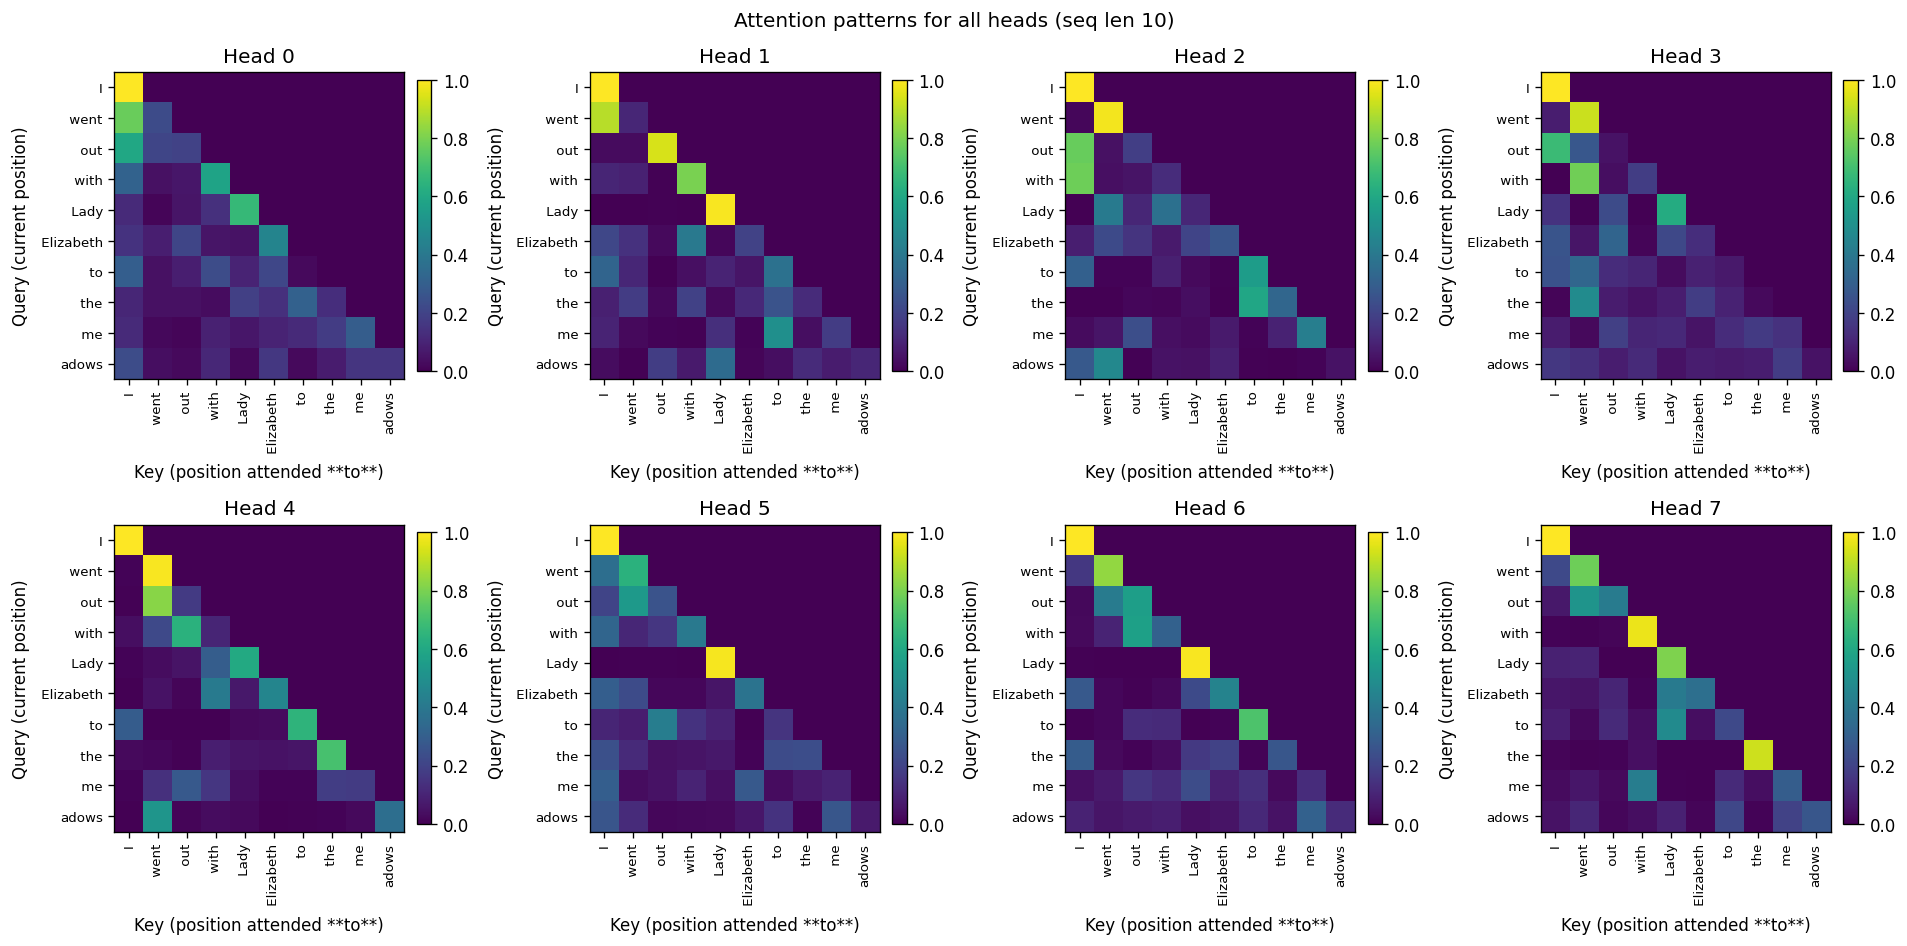

In [55]:
prompt = "I went out with Lady Elizabeth to the meadows"
visualize_attention(model, config["tokenizer"], prompt, head=None)   # all heads grid

In [56]:
# visualize_attention(model, config["tokenizer"], prompt, head=3)      # just head 3
attention_widget(model, model.tokenizer, prompt)

interactive(children=(IntSlider(value=0, description='Head', max=7), Output()), _dom_classes=('widget-interact…

### **3. 4**.&nbsp; 🔁 **Feedforward Layers and Transformer Blocks**

After the attention layer allows each token to gather context from other tokens in the sequence, we still need a way for the model to **transform and refine** this information. That is the job of the **Feedforward Neural Network (FFN)** block.

Think of it this way: attention lets a token *look around*, but the feedforward block lets it *think*. It applies non-linear transformations to each token's representation **independently**, enabling the model to capture complex patterns, reweight features, and inject additional depth to the learned meaning.

But one attention + feedforward combo is not enough to model the full richness of natural language. Language has multiple layers of structure — syntax, semantics, discourse, etc. For that reason, we **stack multiple transformer blocks**. Each block learns increasingly abstract and meaningful representations of the input. Early layers might learn basic syntax; deeper ones grasp word sense, grammar rules, and long-range dependencies.

Each transformer block is composed of:
- **Multi-head attention** to gather contextual information
- A **feedforward block** to process and transform it
- **LayerNorm**, **residual (skip) connections**, and **dropout**, which help with training stability and generalization

Together, these building blocks form the **core of a Transformer language model** — scalable, expressive, and capable of capturing the full complexity of language.

In [31]:
#@title FeedForward and Transformer Block Classes

class FeedForward(torch.nn.Module):
    """
    Position-wise Feedforward Neural Network used inside each Transformer block.

    This layer:
    - Applies two linear transformations with a non-linearity (GELU) in between.
    - Expands the embedding dimension by 4x and then reduces it back.
    - Processes each token position independently (i.e., across the sequence dimension).
    - Includes dropout to reduce overfitting.

    Args:
        n_embd (int): Embedding dimension (input and output size).
        dropout (float): Dropout probability applied after the second linear layer.
    """
    def __init__(self, n_embd, dropout):
        super().__init__()

        self.ff = torch.nn.Sequential(
            torch.nn.Linear(n_embd, n_embd * 4),  # project up to a higher dimension (helps find and store more information for each token)
            torch.nn.GELU(),                      # Non-linear activation (helps model complex relationships in data)
            torch.nn.Linear(n_embd * 4, n_embd),  # project back to original embedding size (to feed to the next attention layer and let tokens learn from each other again!)
            torch.nn.Dropout(dropout)             # Apply dropout to prevent memorising data, encourages generalisation!
        )

    def forward(self, x):
        return self.ff(x)  # Apply the feedforward network to every token embedding


class TfBlock(torch.nn.Module):
    """
    A single Transformer block composed of:
    - Multi-head self-attention (MHA)
    - Feedforward neural network (FFN)
    - Layer normalization (applied before each sub-block)
    - Residual (skip) connections around both MHA and FFN

    This design follows the Transformer architecture introduced in "Attention is All You Need".

    Args:
        n_embd (int): Embedding dimension (model hidden size).
        n_heads (int): Number of attention heads.
        context_len (int): Sequence length (for causal masking).
        dropout (float): Dropout probability.
    """
    def __init__(self, n_embd, n_heads, context_len, dropout):
        super().__init__()
        self.mha = MultiHeadAttention(n_embd, n_heads, context_len, dropout)  # Contextualization via attention
        self.ff = FeedForward(n_embd, dropout)                                # Independent processing of token reps
        self.norm_1 = torch.nn.LayerNorm(n_embd)  # Normalize before MHA (Pre-LN); this helps stabilise gradient flow! CRUCIAL for deep nns.
        self.norm_2 = torch.nn.LayerNorm(n_embd)  # Normalize before FFN (Pre-LN); this helps stabilise gradient flow! CRUCIAL for deep nns.

    def forward(self, x):
        # LayerNorm + Residual around attention
        x = x + self.mha(self.norm_1(x))

        # LayerNorm + Residual around feedforward
        x = x + self.ff(self.norm_2(x))

        return x  # Output of one transformer block

In [57]:
#@title Full Transformer Model

class LanguageModel(torch.nn.Module):
    """
    A Transformer-based language model using multi-head self-attention and stacked Transformer blocks.

    This model replaces recurrent layers with attention-based blocks to enable parallelization,
    longer context modeling, and richer language representations.

    Args:
        n_embd (int): Dimensionality of token and positional embeddings.
        tokenizer (SimpleTokenizer): Tokenizer for encoding/decoding text.
        device (str): Device to run the model on ("cpu" or "cuda").
        dropout (float): Dropout rate applied in attention and feedforward layers.
        context_len (int): Maximum input sequence length (context window).
        n_heads (int): Number of attention heads.
        n_blocks (int): Number of Transformer blocks (depth).
    """
    def __init__(
        self,
        n_embd,
        tokenizer,
        device="cpu",
        dropout=0.2,
        context_len=64,
        n_heads=4,
        n_blocks=3
    ):
        super().__init__()
        self.tokenizer = tokenizer
        self.device = device
        self.dropout = dropout
        self.vocab_size = tokenizer.n_vocab
        self.context_len = context_len

        # Token embedding layer: learns a vector for each token ID
        self.embd = torch.nn.Embedding(self.vocab_size, n_embd)

        # Positional embedding layer: adds sequence order info to each token
        self.pos_embd = torch.nn.Embedding(self.context_len, n_embd)

        # Stack of Transformer blocks: each contains attention, FFN, norm, etc.
        self.blocks = torch.nn.Sequential(*[
            TfBlock(n_embd, n_heads, context_len, dropout)
            for _ in range(n_blocks)
        ])

        # Final layer norm after all blocks
        self.norm_final = torch.nn.LayerNorm(n_embd)

        # Output projection: from final embedding to vocabulary logits
        self.out = torch.nn.Linear(n_embd, self.vocab_size)

    def forward(self, x):
        """
        Forward pass through the model.

        Args:
            x (Tensor): Input tensor of shape [batch_size, context_len]

        Returns:
            logits (Tensor): Output tensor of shape [batch_size, context_len, vocab_size]
        """
        seq_len = x.shape[1]

        # Token and positional embeddings
        embds = self.embd(x)  # (B, seq_len, n_embd)
        pos = torch.arange(seq_len, device=self.device).unsqueeze(0)  # (1, seq_len)
        embds = embds + self.pos_embd(pos)  # Add token + position embeddings

        # Apply transformer blocks
        blocks_out = self.blocks(embds)  # (B, seq_len, n_embd)

        # Normalize and project to vocab space
        normed_out = self.norm_final(blocks_out)
        logits = self.out(normed_out)
        return logits

    def fit(self, train_loader, val_loader=None, epochs=5, lr=1e-3):
        """
        Train the language model.

        Args:
            train_loader (DataLoader): Training data.
            val_loader (DataLoader, optional): Validation data.
            epochs (int): Number of training epochs.
            lr (float): Learning rate.
        """
        self.to(self.device)
        optimizer = torch.optim.AdamW(self.parameters(), lr=lr)
        loss_fn = torch.nn.CrossEntropyLoss()

        for epoch in range(epochs):
            self.train()
            total_train_loss = 0.0

            for X, Y in train_loader:
                X, Y = X.to(self.device), Y.to(self.device)

                logits = self(X).view(-1, self.vocab_size)
                Y = Y.view(-1)
                loss = loss_fn(logits, Y)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                total_train_loss += loss.item()

            avg_train_loss = total_train_loss / len(train_loader)

            if val_loader is not None:
                self.eval()
                total_val_loss = 0.0
                with torch.no_grad():
                    for Xv, Yv in val_loader:
                        Xv, Yv = Xv.to(self.device), Yv.to(self.device)
                        val_logits = self(Xv).view(-1, self.vocab_size)
                        Yv = Yv.view(-1)
                        val_loss = loss_fn(val_logits, Yv)
                        total_val_loss += val_loss.item()

                avg_val_loss = total_val_loss / len(val_loader)

                print(f"Epoch [{epoch+1}/{epochs}]"
                      f"  Train Loss: {avg_train_loss:.3f}"
                      f"  |  Val Loss: {avg_val_loss:.3f}")
            else:
                print(f"Epoch [{epoch+1}/{epochs}]"
                      f"  Train Loss: {avg_train_loss:.3f}")

    def generate(self, prompt, max_new_tokens=16, temperature=1.0, top_k=50):
        """
        Generate text from a prompt using temperature and top-k sampling.

        Args:
            prompt (str): Prompt string to continue from.
            max_new_tokens (int): Number of tokens to generate.
            temperature (float): Controls randomness. Lower = more confident predictions.
            top_k (int): Only sample from the top-k most likely next tokens.

        Returns:
            str: The generated text.
        """
        self.eval()
        input_ids = torch.tensor([self.tokenizer.encode(prompt)], device=self.device)

        with torch.no_grad():
            for _ in range(max_new_tokens):
                # Only keep the most recent tokens for context
                input_ids_cond = input_ids[:, -self.context_len:]

                logits = self(input_ids_cond)
                logits = logits[:, -1, :]  # Focus only on the last token position, but get scores for all tokens in vocab!

                # Scale logits using temperature
                logits /= max(temperature, 1e-5) # max(t, 1e-5) ensures zero can never be provided

                # Apply top-k sampling
                if top_k > 0:
                    top_k_values, _ = torch.topk(logits, k=top_k)
                    min_top_k = top_k_values[:, -1].unsqueeze(-1)
                    logits = torch.where(
                        logits < min_top_k,
                        torch.tensor(float('-inf'), device=self.device),
                        logits
                    )

                # Convert to probabilities and sample next token
                probs = torch.softmax(logits, dim=-1)
                next_token = torch.multinomial(probs, num_samples=1)

                input_ids = torch.cat([input_ids, next_token], dim=1)

        return self.tokenizer.decode(input_ids[0].tolist())

### **Decoding Strategies**

Notice we have changed the way `.generate()` method operates. Now we have added the possibility to adjust how model picks up tokens from the probability distribution over the vocab! Here is what we have done, and some other strategies we could have implemented:

**Decoding strategies** define how a language model selects the next token when generating text. While the model outputs a probability distribution over the entire vocabulary at each step, decoding methods determine *how* we sample from that distribution—balancing between coherence and creativity. ✨

- 🔁 **Greedy decoding** (what we sort of had before) picks the token with the highest probability at each step. It is fast and simple, but often leads to repetitive or boring outputs because it always follows the most likely path, ignoring diversity.

- 🌐 **Beam search** (not implemented, but very popular!) keeps multiple candidate sequences (called *beams*) active at once and selects the best overall sequence. It explores more possibilities than greedy decoding, producing more coherent results, but still tends to lack diversity and is slower.

- 🌡️ **Temperature scaling** adjusts the sharpness of the probability distribution before sampling. A **low temperature** (e.g. 0.7) makes the model more confident and deterministic. A **high temperature** (e.g. 1.5) makes the model more creative and random.

- 🎯 **Top-k sampling** limits sampling to the top *k* most likely tokens, ignoring the rest. This reduces the chance of sampling very unlikely words, keeping generations more plausible while still allowing for variety.

Together, **temperature** and **top-k** give fine-grained control over generation: top-k narrows the field of possible tokens 🎯, while temperature controls how boldly the model explores within that field 🌡️. This makes it possible to generate outputs that are both coherent and engaging—perfect for storytelling, dialogue, and other creative tasks. ✍️

In [58]:
#@title New Config, separating Data and Model configurations

# Main Configuration file, stores parameters that determine how we conduct training
CONTEXT_LEN = 128

data_config = {
    "tokenizer": bpe_tokenizer,
    "context_len": CONTEXT_LEN, # dataset context_len has to be smaller or equal to model_context len!
    "stride": 64,
    "batch_size": 64,
}

model_config = {
    "n_embd": 128,
    "tokenizer": bpe_tokenizer,
    "device": "cuda",
    "context_len": CONTEXT_LEN, # dataset context_len has to be smaller or equal to model_context len!
    "n_heads": 16,
    "n_blocks": 3, # we added number of transformer blocks into config!
    "dropout": 0.1
}

In [ ]:
#@title Re-Instantiate Dataset and Dataloaders

ds = CustomDataset(
    text=cleaned_text,
    tokenizer=data_config["tokenizer"],
    context_len=data_config["context_len"],
    stride=data_config["stride"]
)

# Split dataset into train and validation sets
dataset_size = len(ds)
train_size = int(0.9 * dataset_size)
val_size = dataset_size - train_size

train_loader = DataLoader(
    train_ds,
    batch_size=data_config["batch_size"],
    shuffle=True,
    drop_last=True,
    num_workers=0
)

val_loader = DataLoader(
    val_ds,
    batch_size=data_config["batch_size"],
    shuffle=False,
    drop_last=True,
    num_workers=0
)

In [59]:
# runs for about 3 mins on T4
model = LanguageModel(**model_config)
model.fit(train_loader, val_loader, epochs=10, lr=0.01)

Epoch [1/10]  Train Loss: 6.336  |  Val Loss: 5.522
Epoch [2/10]  Train Loss: 5.211  |  Val Loss: 4.974
Epoch [3/10]  Train Loss: 4.752  |  Val Loss: 4.659
Epoch [4/10]  Train Loss: 4.396  |  Val Loss: 4.484
Epoch [5/10]  Train Loss: 4.090  |  Val Loss: 4.314
Epoch [6/10]  Train Loss: 3.830  |  Val Loss: 4.217
Epoch [7/10]  Train Loss: 3.595  |  Val Loss: 4.089
Epoch [8/10]  Train Loss: 3.385  |  Val Loss: 3.964
Epoch [9/10]  Train Loss: 3.185  |  Val Loss: 3.849
Epoch [10/10]  Train Loss: 2.998  |  Val Loss: 3.751


In [60]:
# be careful not to overextend max_new_tokens! Cannot be larger than model context_len!

print(model.generate("I went out with Lady Elizabeth to the meadows", max_new_tokens=128))

I went out with Lady Elizabeth to the meadows in a fine, let
obedient in the very reverse of the family, and good estate,’s
partman, allowing I know that would certainly be sullable to the slave-parliven us are at home
behind. I have the avenue can be sent away so retent. My
own state.”

“But he is not know it would not see it, if my own: it may be nothing could not like to be _your_, or
scheme_. Of I must be ever have the right; and
last day before you would not have read. I


In [61]:
#@title Attention Vizualisation

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, VBox, HTML

def _plot_heatmap(ax, data, toks, title, vmax):
    im = ax.imshow(data, vmin=0.0, vmax=vmax, aspect="auto", cmap="viridis")
    ax.set_xticks(range(len(toks)))
    ax.set_xticklabels(toks, rotation=90, fontsize=8)
    ax.set_yticks(range(len(toks)))
    ax.set_yticklabels(toks, fontsize=8)
    ax.set_xlabel("Key (position attended **to**)")
    ax.set_ylabel("Query (current position)")
    ax.set_title(title, fontsize=10)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)


def get_attention(model, input_ids: torch.Tensor, *, block: int = -1):
    """
    Returns:
        attn  – Tensor[H, S, S]  (soft-maxed weights)
        toks  – List[str]        (decoded tokens)
    """
    model.eval()
    with torch.no_grad():
        _ = model(input_ids.to(model.device))          # fills caches

    # allow negative indexing (-1 = last block)
    attn = model.blocks[block].mha.last_attn[0].cpu()  # [H, S, S]
    toks = [model.tokenizer.decode([tid]) for tid in input_ids[0]]

    return attn, toks


def visualize_attention(
    model,
    tokenizer,
    text: str,
    *,
    head: int | None = None,
    block: int = -1,
    figsize: float = 4,
    dpi: int = 120,
    vmax: float | None = None,
):
    """
    - head=None   → grid of all heads
    - head=int    → single head
    - block=int   → which Transformer block (-1 = last)
    """
    ids = torch.tensor([tokenizer.encode(text)], device=model.device)
    attn, toks = get_attention(model, ids, block=block)

    n_heads, L, _ = attn.shape
    if vmax is None:
        vmax = attn.max().item()

    # ---------- ALL HEADS ----------
    if head is None:
        ncols = 4
        nrows = int(np.ceil(n_heads / ncols))
        fig, axes = plt.subplots(
            nrows,
            ncols,
            figsize=(figsize * ncols, figsize * nrows),
            dpi=dpi,
            squeeze=False,
        )

        for h in range(n_heads):
            r, c = divmod(h, ncols)
            _plot_heatmap(
                ax=axes[r][c],
                data=attn[h],
                toks=toks,
                title=f"Head {h}",
                vmax=vmax,
            )

        # hide any unused sub-plots
        for idx in range(n_heads, nrows * ncols):
            r, c = divmod(idx, ncols)
            axes[r][c].axis("off")

        fig.suptitle(
            f"Block {block if block >=0 else (len(model.blocks)+block)} "
            f"— attention for **all heads** (seq len {L})",
            fontsize=12,
        )
        plt.tight_layout()
        plt.show()
        return

    # ---------- SINGLE HEAD ----------
    if not (0 <= head < n_heads):
        raise ValueError(f"`head` must be in [0, {n_heads-1}]")

    fig, ax = plt.subplots(figsize=(figsize, figsize), dpi=dpi)
    _plot_heatmap(
        ax=ax,
        data=attn[head],
        toks=toks,
        title=f"Block {block if block >=0 else (len(model.blocks)+block)} • Head {head}",
        vmax=vmax,
    )
    plt.tight_layout()
    plt.show()

def attention_widget(model, tokenizer, text):
    """
    Interactive widget for exploring attention maps.

    - Block slider picks which Transformer layer (TfBlock) to inspect.
    - Head  slider picks the head inside that block.
      -1  ⇒  all heads in a grid.
    """
    n_blocks = len(model.blocks)
    n_heads  = model.blocks[0].mha.num_heads     # assume same for every block

    # sliders -----------------------------------------------------------
    block_slider = IntSlider(
        value = n_blocks - 1,
        min   = 0,
        max   = n_blocks - 1,
        step  = 1,
        description = "Block",
        continuous_update = False,   # redraw only when user releases handle
    )

    head_slider = IntSlider(
        value = -1,                  # -1 means “all heads”
        min   = -1,
        max   = n_heads - 1,
        step  = 1,
        description = "Head (-1 = all)",
        continuous_update = False,
    )

    # callback ----------------------------------------------------------
    def _viz(block, head):
        h = None if head == -1 else head
        visualize_attention(
            model, tokenizer, text,
            head = h,
            block = block
        )

    interact(                    # <─ ties the sliders to the callback
        _viz,
        block = block_slider,
        head  = head_slider
    )

    # (optional) little instruction footer
    display(VBox([
        HTML("<b>Instructions:</b> "
             "• Move the <i>Block</i> slider to choose a layer. "
             "• Set <i>Head</i> to –1 to see all heads in that layer.")
    ]))

In [ ]:
# visualize_attention(model, model.tokenizer, prompt, head=None, block=0) # first block
# visualize_attention(model, model.tokenizer, prompt, head=None, block=-1) # last block

In [63]:
attention_widget(model, model.tokenizer, prompt) # vizualise via widget

interactive(children=(IntSlider(value=2, continuous_update=False, description='Block', max=2), IntSlider(value…

🧠 **Exercise**!


- Now that you have a working language model, it is prime time to experiment! Try changing the model configuration parameters—for example, increase the embedding size, number of attention heads (**`n_embd` must be divisible by `head_size`** though, think why!), or the number of transformer blocks. Can you improve your model's performance or make it more expressive?

- Try training model for longer! But beware overfitting (which you notice when val loss stops decreasing. If it starts increasing: you are in big trouble!).

- Play with the generation parameters like temperature and top_k. How does adjusting temperature affect the creativity or determinism of the output? What happens when you make `top_k` smaller or larger? These decoding strategies control how the model samples words, so they have a huge impact on the style and diversity of the generated text.

There's no single “best” setup—feel free to test, compare, and observe! What surprises you? What combinations lead to the most natural (or most bizzare) completions? Share them with a friend!

In [ ]:
### hint: uncomment and run in case CUDA out of memory issue
# del model
# torch.cuda.empty_cache()